<img src="ITESO.jpg">

# <center> <font color = "darkslategrey"> Proyecto Final: Portafolios de Inversión <font /> <center/>

elaborado por:
+ López Lazareno Diego Alberto: if722100@iteso.mx
+ Loza de la Torre Eduardo: if713423@iteso.mx
+ Márquez Delgado Esteban: if700637@iteso.mx

# <font color = "teal"> Quantamental Investing <color/> 

+ El objetivo del presente proyecto es diseñar portafolios de inversión con activos reales de nuestra preferencia para evaluar qué tan buena habría sido nuestra inversión en caso de haberla realizado. 

<img src="https://media.warriortrading.com/2019/11/shutterstock_361528229.jpg" width="600" height="250px" />   

Hace ya varias décadas un joven estudiante de doctorado llamado [Harry Markowitz](https://es.wikipedia.org/wiki/Harry_Markowitz) publicó un artículo titulado *Portfolio Selection* en el Journal of Finance que vino a revolucionar completamente el mundo de las inversiones. Básicamente lo que Markowitz nos aporta es un método para la selección de una cartera óptima dadas nuestras preferencias como inversores, las cuales son capturadas por medias y varianzas. Sin embargo, la **Teoría Moderna de Portafolios** propuesta por Markowitz se encarga únicamente de una segunda etapa en el proceso de selección de una cartera (que es la estudiada en el presente curso), siendo la primera etapa la observación y la experiencia. Básicamente lo anterior nos quiere decir que para conformar un portafolio existe un primer paso que es el del análisis riguroso hacia las compañías cuyos activos queremos incluir en nuestra cartera, seguido de un segundo paso que empieza con las expectativas del comportamiento futuro de dichos activos; para así concluir con una selección óptima de portafolio de acuerdo a nuestras preferencias como inversionistas. 

Es por esto que en el presente proyecto aplicaremos ambas etapas para la conformación de portafolios de inversión, siendo los datos financieros y contables de las empresas los que nos ayudarán a seleccionar de acuerdo a ciertos criterios a aquellas compañías del S&P 500 que son saludables y que por ende merecen ser incluidas en una cartera. Es necesario hacer hincapié en que todo lo anterior es una especie de suerte entre el *big data, los métodos de análisis fundamental ampliamente usados durante todo el siglo pasado y presente por numerosos inversionistas y claro, los modelos matemáticos*: de ahí que nuestro proyecto reciba el nombre de **Quantamental Investing**, una combinación entre los términos *quantitative* y *fundamental*. 

# <font color = "navy"> Etapa 1. Observación y Experiencia <font/>

## <font color = "steelblue"> Descarga y Limpieza de Datos Financieros <font/>

En esta sección nos encargaremos de la descarga de todas las métricas financieras y contables relevantes para nuestro análisis con la ayuda de la API [Financial Modeling Prep](https://financialmodelingprep.com/). A continuación se listan los ratios financieros necesarios para la correcta selección de activos:

+ **Earnings Per Share (EPS)** ~ *(Beneficio por acción)*: mide la rentabilidad por acción en un periodo determinado, su fórmula es la siguiente:

$$ EPS = \frac{Ingresos \space Netos}{Número \space de \space Acciones \space en \space Circulación} $$

+ **Return on Invested Capital (ROIC)** ~ *(Retorno sobre el capital invertido)*: mide qué tan bien utiliza una compañía sus recursos para generar ganancias, su fórmula es la siguiente:

$$ ROIC = \frac{Ingresos \space Netos}{Capital \space Invertido} $$

+ **Interest Coverage Ratio (TIE)** ~ *(Ratio de cobertura de intereses)*: mide la capacidad de una compañía para cumplir con los pagos de su deuda, su fórmula es la siguiente:

$$ TIE = \frac{Beneficios \space antes \space de \space Intereses \space e \space Impuestos}{Gastos \space por \space Intereses} $$

+ **Price to Earnings Ratio (PER o P/E)** ~ *(Ratio precio-beneficio)*: indica cuántas veces se está pagando el beneficio neto anual de una empresa al comprar una acción de ésta, su fórmula es la siguiente:

$$ PER = \frac{Precio}{Beneficio \space por \space Acción} $$

+ **Debt Payback Time (Debt to FCF)** ~ *(Tiempo de pago de la deuda)*: indica cuánto tiempo le tomaría a una compañía pagar toda su deuda, su fórmula es la siguiente:

$$ Debt \space to \space FCF = \frac{Deuda \space a \space Largo \space Plazo}{Flujo \space de \space Caja \space Libre} $$

+ **Earnings Per Share Growth Rate 3Y** ~ *(Tasa de crecimiento del ratio EPS (3 años))*.

In [1]:
## Librerías necesarias
# Análisis y manejo de datos
import pandas as pd
import numpy as np

# Financial Modeling Prep
from pyfmpcloud import settings
from pyfmpcloud import company_valuation as cv

In [2]:
# API Key
api_key = pd.read_csv("APIKEY-FMP.csv").iloc[0, 0]
settings.set_apikey(api_key)

In [3]:
# Compañías que forman parte del S&P-500
sp500_companies = pd.read_csv("S&P500_companies.csv", index_col = [0])
sp500_companies.columns = ["S&P 500"]
sp500_companies.head()

,S&P 500
0,MMM
1,ABT
2,ABBV
3,ABMD
4,ACN


In [4]:
sp500_companies.tail()

,S&P 500
500,YUM
501,ZBRA
502,ZBH
503,ZION
504,ZTS


In [5]:
# Búsqueda de compañías del S&P 500 que tengan más de 10 años cotizando en bolsa
sp500_companies = list(sp500_companies.iloc[:, 0])
tickers = []

for ticker in sp500_companies:
    try:
        if len(cv.income_statement(ticker, period = "annual")) >= 10:
            tickers.append(ticker)
            
    except:
        print("No se pudo encontrar información para:", ticker)
        
len(tickers)

444

In [6]:
## Descarga masiva de métricas y ratios financieros para las compañías seleccionadas
cols = ["2014"]

eps = pd.DataFrame(np.nan, index = tickers, columns = cols)
roic = pd.DataFrame(np.nan, index = tickers, columns = cols)
interest_coverage = pd.DataFrame(np.nan, index = tickers, columns = cols)
pe = pd.DataFrame(np.nan, index = tickers, columns = cols)
eps_growth = pd.DataFrame(np.nan, index = tickers, columns = cols)
debt_to_fcf = pd.DataFrame(np.nan, index = tickers, columns = cols)

i = 0
for ticker in tickers:
    try:
        ## -------------------- Company key metrics ------------------------ ##
        df = cv.key_metrics(ticker, period = "annual")
        df = df[(df["date"] <= "2014-12-31") & (df["date"] >= "2014-01-01")]
    
        # EPS
        eps.iloc[i, :] = df["netIncomePerShare"][df.index[0]]
        # ROIC
        roic.iloc[i, :] = df["roic"][df.index[0]]
        # TIE
        interest_coverage.iloc[i, :] = df["interestCoverage"][df.index[0]]
        # PER
        pe.iloc[i, :] = df["peRatio"][df.index[0]]
    
    
        ## ------------------ Company financial growth ---------------------- ##
        df = cv.financial_statements_growth(ticker, period = "annual")
        df = df[(df["date"] <= "2014-12-31") & (df["date"] >= "2014-01-01")]
    
        # PER growth (3 years)
        eps_growth.iloc[i, :] = df["threeYNetIncomeGrowthPerShare"][df.index[0]]
        
    
        ## ------------------------- Company financial statements --------------------------- ##
        df1 = cv.balance_sheet(ticker, period = "annual")
        df1 = df1[(df1["date"] <= "2014-12-31") & (df1["date"] >= "2014-01-01")]
    
        df2 = cv.cash_flow_statement(ticker, period = "annual")
        df2 = df2[(df2["date"] <= "2014-12-31") & (df2["date"] >= "2014-01-01")]
 
        # Debt payback time
        debt_to_fcf.iloc[i, :] = df1["longTermDebt"][df.index[0]] / df2["freeCashFlow"][df.index[0]]
    
    except:
        print("No se pudo encontrar información para:", ticker)
    
    i += 1

No se pudo encontrar información para: AAP
No se pudo encontrar información para: AVY
No se pudo encontrar información para: CDNS
No se pudo encontrar información para: CERN
No se pudo encontrar información para: HBI
No se pudo encontrar información para: HWM
No se pudo encontrar información para: K
No se pudo encontrar información para: SNA
No se pudo encontrar información para: SWK
No se pudo encontrar información para: TMUS
No se pudo encontrar información para: TXT
No se pudo encontrar información para: UA
No se pudo encontrar información para: VFC


In [7]:
# Limpieza de datos
eps.dropna(inplace = True) 
roic.dropna(inplace = True)
eps_growth.dropna(inplace = True)
interest_coverage.dropna(inplace = True)
debt_to_fcf.dropna(inplace = True)
pe.dropna(inplace = True)
common_index = (eps.index & roic.index & eps_growth.index & interest_coverage.index & debt_to_fcf.index & pe.index)

eps = eps.loc[common_index, :]
roic = roic.loc[common_index, :]
eps_growth = eps_growth.loc[common_index, :]
interest_coverage = interest_coverage.loc[common_index, :]
debt_to_fcf = debt_to_fcf.loc[common_index, :]
pe = pe.loc[common_index, :]

len(eps)

415

# <font color = "navy"> Etapa 2. Expectativas <font/>

Ahora es el turno de filtrar a las compañías con ayuda de las métricas financieras descargadas previamente. Lo que buscamos son empresas que cumplan con las siguientes características:

+ **Earnings Per Share (EPS) positivo**, mientras más alto significa que la acción es más rentable. 
+ **Return on Invested Capital (ROIC) positivo**, mientras más alto significa que la compañía emplea de forma eficiente sus recursos para generar ganancias.
+ **Interest Coverage Ratio (TIE) mayor a 6** (razón estándar para acciones americanas), mientras más alto significa que la empresa puede hacer frente a sus obligaciones.
+ **Price to Earnings Ratio (PER) razonable**, ya que no queremos pagar demasiado por cada dólar de beneficio neto que genera la compañía. Un PER de 15 se considera razonable.  
+ **Debt Payback Time menor a 3 años**, puesto que no son deseables las compañías a las que les tomaría demasiado tiempo saldar sus deudas.
+ **Earnings Per Share Growth Rate (3Y) positivo**, lo que significa que las ganancias por acción han ido aumentando a lo largo del tiempo.

Una vez terminado el filtrado de las compañías, se seleccionarán 20 activos y se procederá a evaluar las expectativas de su comportamiento futuro, de esta forma podremos conformar el **Portafolio Eficiente en Media-Varianza** -para cada año a partir del 2014- que es el del mayor *Ratio de Sharpe* (mayor exceso de rendimiento por cada unidad de riesgo asumida) y también llegaremos a la asignación óptima de capital dadas nuestras preferencias como inversionistas. Sobre esto último decidimos que como inversionistas queremos invertir todo nuestro dinero en el portafolio de activos riesgosos, puesto que no nos interesa tener en cartera al activo libre de riesgo. Por último resta evaluar el desempeño de todos los portafolios conformados para cada año a partir del 2014 con un horizonte de inversión de 252 días.

## Filtrado de Compañías 

In [8]:
# Filtrado de compañías tentativas para invertir 
rank = pd.DataFrame(index = eps.index)
rank["EPS"] = eps["2014"]
rank["EPS_3YGrowth"] = eps_growth["2014"]
rank["ROIC"] = roic["2014"]
rank["InterestCoverage"] = interest_coverage["2014"]
rank["DebtPaybackTime"] = debt_to_fcf["2014"]
rank["PE"] = pe["2014"]

filtered_companies = rank[(rank["EPS"] > 0) & (rank["EPS_3YGrowth"] > 0) & (rank["ROIC"] > 0) & (rank["InterestCoverage"] >=6) & (rank["DebtPaybackTime"] <= 3) & (rank["DebtPaybackTime"] > 0)]
filtered_companies.to_csv("filtered_stocks.csv")
filtered_companies

,EPS,EPS_3YGrowth,ROIC,InterestCoverage,DebtPaybackTime,PE
MMM,7.636364,0.262327,0.278026,49.478873,1.322813,18.058543
ACN,4.274709,0.386747,0.439828,243.913512,0.008217,16.734939
AFL,3.250000,0.553844,0.190063,14.167192,0.806412,7.195938
ALK,4.422515,1.655318,0.216186,20.312500,2.041667,13.987563
ALXN,3.258433,2.565130,0.242587,292.454728,0.232420,56.235628
ALL,6.506849,3.318632,0.154048,13.155280,1.761872,9.601805
GOOGL,20.576419,0.382046,0.153539,29.502564,0.268776,26.124565
AME,2.365439,0.496163,0.146730,10.069062,2.181063,19.496042
AAPL,1.613180,0.632223,0.317612,139.278646,0.580902,16.289257
ADM,3.426829,0.866123,0.110114,9.287834,1.366273,11.406696


## Activos Seleccionados:

A continuación se listan las acciones seleccionadas con base en el filtrado realizado. Para la selección se tomó en cuenta a las compañías con un alto $EPS$, un ratio $PER$ razonable (pues no queremos comprar acciones a un precio demasiado caro) y una tasa de crecimiento del ratio $EPS$ alta.

+ ALK ~ Alaska Air Group
+ GOOGL ~ Alphabet Inc. Class A
+ AAPL ~ Apple
+ BLK ~ BlackRock
+ BA ~ Boeing
+ CB ~ Chubb Ltd
+ COST ~ Costco
+ CVS ~ CVS Health
+ GD ~ General Dynamics
+ GPC ~ Genuine Parts Company
+ IFF ~ International Flavors & Fragrances
+ JNJ ~ Johnson & Johnson
+ LMT ~ Lockheed Martin
+ NOV ~ National Oilwell Varco
+ NVDA ~ Nvidia
+ ORCL ~ Oracle Corporation
+ ROK ~ Rockwell Automation
+ ROP ~ Roper Technologies
+ TEL ~ TE Connectivity
+ TXN ~ Texas Instruments

## <font color = "black"> Portafolio de Inversión para el Año 2015 <font/>

In [1]:
## Librerías necesarias
# Análisis y manejo de datos
import pandas as pd
import numpy as np

# Yfinance para la descarga masiva de precios históricos de acciones
import yfinance as yf

# Optimización 
from scipy.optimize import minimize

# Visualización
import matplotlib.pyplot as plt 
%matplotlib inline

### Teoría Moderna de Portafolios

In [75]:
# Acciones seleccionadas
stocks = ["ALK", "GOOGL", "AAPL", "BLK", "BA", "CB", "COST", "CVS", "GD", "GPC", "IFF", "JNJ", "LMT", "NOV", "NVDA", "ORCL", "ROK", "ROP", "TEL", "TXN"]
data = pd.DataFrame()

# Descarga masiva de precios históricos en temporalidad diaria
for ticker in stocks:
    data[ticker] = yf.download(ticker, start = "2011-12-31", end = "2014-12-31", progress = False)["Adj Close"]
    
# Caracterización de la distribución de los rendimientos
returns = data.pct_change().dropna()
mean_ret = returns.mean() * 252
cov = returns.cov() * 252
stocks_summary = pd.DataFrame({"Rendimiento" : mean_ret, "Volatilidad" : returns.std()*np.sqrt(252)})

# Treasury Yield Curve Rates 1Yr (2014-12-31) 
rf = 0.25 / (100)

# Datos necesarios para resolver los problemas de optimización
N = len(mean_ret)
w0 = np.ones(N) / N
bnds = ((0, None), ) * N
cons = {"type" : "eq", "fun" : lambda w : w.sum() - 1}

# Función a minimizar para encontrar el portafolio de mínima varianza
def Var(w, cov):
    return np.dot(w.T, np.dot(cov, w))

# Función a minimizar para encontrar el portafolio eficiente en media-varianza
def Minus_RatioSharpe(w, er, rf, cov):
    erp = np.dot(w.T, er)
    sp = np.dot(w.T, np.dot(cov, w))**0.5
    RS = (erp - rf) / sp
    return -RS

# Optimización con el módulo minimize
pmv = minimize(fun = Var, x0 = w0, args = (cov,), bounds = bnds, constraints = cons, tol = 1e-10)
pemv = minimize(fun = Minus_RatioSharpe, x0 = w0, args = (mean_ret, rf, cov), bounds = bnds, constraints = cons, tol = 1e-10)

In [76]:
# Ponderaciones del portafolio eficiente en media-varianza
w_pemv = pd.DataFrame(np.round(pemv.x.reshape(1, N), 4), columns = returns.columns, index = ["Ponderación"])
w_pemv[w_pemv <= 0.0] = np.nan
w_pemv.dropna(axis = 1, inplace = True)
w_pemv

,ALK,AAPL,CB,COST,CVS,JNJ,LMT
Ponderación,0.095,0.0625,0.0068,0.1011,0.3054,0.0651,0.3642


In [77]:
# Métricas del portafolio eficiente en media-varianza (anualizadas)
Er_pemv = np.dot(pemv.x.T, mean_ret)
s_pemv = (np.dot(pemv.x.T, np.dot(cov, pemv.x)))**0.5
rf = rf

pemv_summary = pd.DataFrame({"Rendimiento" : Er_pemv, "Volatilidad" : s_pemv,
                            "Ratio Sharpe" : (Er_pemv - rf) / s_pemv}, index = ["Portafolio EMV"])
pemv_summary

,Rendimiento,Volatilidad,Ratio Sharpe
Portafolio EMV,0.318659,0.121014,2.612573


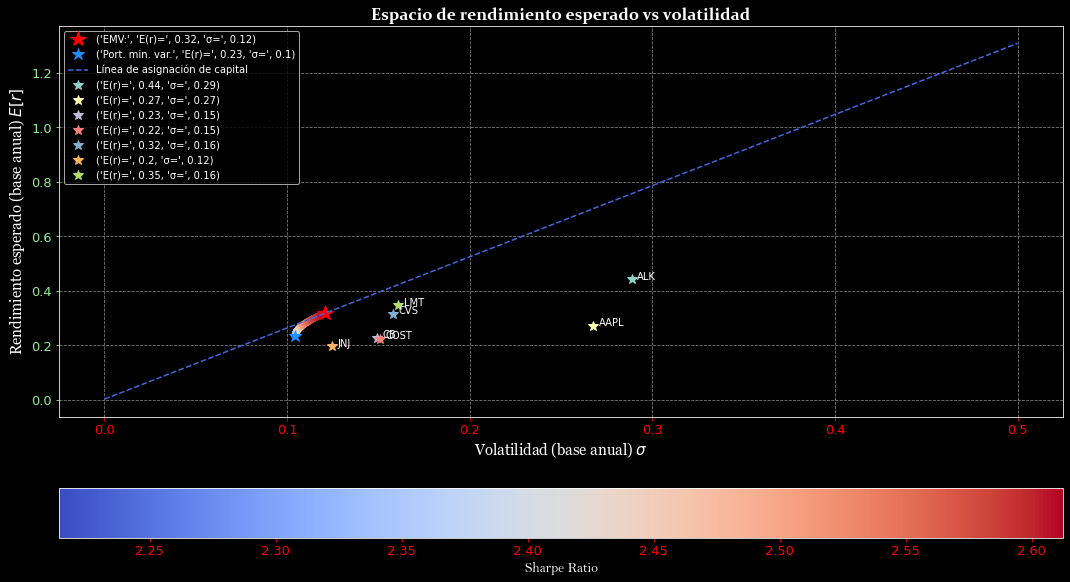

In [78]:
## Gráfico
#Estética
plt.style.use('dark_background')
plt.rc('grid', linestyle="--", color='gray')
plt.rc('ytick', labelsize=13, color='lightgreen')
plt.rc('xtick', labelsize=13, color='red')

# Frontera de mínima varianza
w = np.linspace(0, 1, 100)
Er_pmv = np.dot(pmv.x, mean_ret)
s_pmv = (np.dot(pmv.x.T, np.dot(cov, pmv.x)))**0.5
cov_pmv_pemv = np.dot(pmv.x.T, np.dot(cov, pemv.x))
minvar_frontier = pd.DataFrame({"Volatilidad" : ((w*s_pemv)**2 + 2*w*(1-w)*cov_pmv_pemv + ((1-w)*s_pmv)**2)**0.5, 
                                "Rendimiento" : w*Er_pemv + (1 - w)*Er_pmv})
minvar_frontier["Ratio Sharpe"] = (minvar_frontier["Rendimiento"] - rf) / minvar_frontier["Volatilidad"]

# LAC (Línea de Asignación de Capital)
sp = np.linspace(0, 0.5)
lac = pd.DataFrame({"Volatilidad" : sp, "Rendimiento" : pemv_summary["Ratio Sharpe"].values[0]*sp + rf})

# Visualización
plt.figure(figsize = (18, 10))
# Portafolio eficiente en media-varianza
plt.plot(s_pemv, Er_pemv, "*r", ms=16, label = ("EMV:", 'E(r)=',Er_pemv.round(2),'σ=',s_pemv.round(2)))
# Portafolio de mínima varianza
plt.plot(s_pmv, Er_pmv, "*b", ms=13, color = "dodgerblue",
         label = ("Port. min. var.", 'E(r)=',Er_pmv.round(2),'σ=',s_pmv.round(2)))
# LAC
plt.plot(lac["Volatilidad"], lac["Rendimiento"], "--", color = "royalblue", label = "Línea de asignación de capital")
# Frontera de mínima varianza
plt.scatter(minvar_frontier["Volatilidad"], minvar_frontier["Rendimiento"],
            c = minvar_frontier["Ratio Sharpe"], cmap = "coolwarm")
plt.colorbar(orientation = "horizontal", pad=0.13).set_label(label='Sharpe Ratio',size='14', weight='roman', family="Bell MT")

# Activos individuales
for i in range(len(stocks_summary)):
    if stocks_summary.index[i] in w_pemv.columns:
        plt.plot(stocks_summary.iloc[i, 1], stocks_summary.iloc[i, 0], "*", ms=10, label=('E(r)=',
        stocks_summary.iloc[i, 0].round(2),'σ=',stocks_summary.iloc[i, 1].round(2)))

        plt.text(stocks_summary.iloc[i, 1] + 0.003, stocks_summary.iloc[i, 0], stocks_summary.index[i])
#Estética
plt.title("Espacio de rendimiento esperado vs volatilidad",size='17', weight='bold', family="Constantia")
plt.xlabel("Volatilidad (base anual) $\sigma$",size='15', weight='roman', family="Georgia")
plt.ylabel("Rendimiento esperado (base anual) $E[r]$",size='15', weight='roman', family="Georgia")
plt.grid(True)
plt.legend(loc = "best")

In [79]:
## Asignación óptima del capital
# Se encuentra el coeficiente de aversión al riesgo de tal forma que todo el capital se asigne a los activos riesgosos
lambda_coef = (Er_pemv - rf) / (s_pemv**2) 
w_opt = (Er_pemv - rf) / (lambda_coef * s_pemv**2)

capital_allo = pd.DataFrame({"Aversión al riesgo" : lambda_coef,
                             "Activos riesgosos" : w_opt,
                             "Activo libre de riesgo" : 1-w_opt}, index = ["Asignación óptima de capital"]) 
capital_allo

,Aversión al riesgo,Activos riesgosos,Activo libre de riesgo
Asignación óptima de capital,21.588971,1.0,0.0


### Desempeño del Portafolio Eficiente en Media-Varianza en 2015: Simulación con 10,000 USD 

In [80]:
## Inversión de 10,000 dólares en el portafolio eficiente en media-varianza
# Acciones cuya ponderación arrojada por el optimizador es mayor a 0
stocks = list(w_pemv.columns)
# Capital inicial
capital = 10000 
data = pd.DataFrame()  

# Descarga masiva de históricos para simular el comportamiento del portafolio durante el año 2015
for ticker in stocks:
    data[ticker] = yf.download(ticker, start = "2015-01-01", end = "2015-12-31", progress = False)["Adj Close"]
    
# Precios iniciales a los que se compra cada acción
p_0 = np.array(data.iloc[0,:])
# Capital invertido en cada acción
w = capital * w_pemv.iloc[0].values
# Número de acciones compradas
n_stocks = np.floor(w / p_0)

# Portafolio 
port_2015 = pd.DataFrame(data * n_stocks)
port_2015["Valor del portafolio"] = port_2015.sum(axis=1)

# Dinero en efectivo
cash = capital - port_2015["Valor del portafolio"][0]
port_2015["Valor del portafolio"] = port_2015["Valor del portafolio"] + cash

#Rendimientos diarios y acumulado del portafolio
port_2015["Rendimientos"] = port_2015["Valor del portafolio"].pct_change()
port_2015["Rendimiento acumulado"] = (port_2015["Rendimientos"] + 1).cumprod()
port_2015.head()

,ALK,AAPL,CB,COST,CVS,JNJ,LMT,Valor del portafolio,Rendimientos,Rendimiento acumulado
Date,,,,,,,,,,
2015-01-02,934.793842,617.408800,0.0,990.308716,3028.213104,620.903503,3484.849319,10000.000000,NaN,NaN
2015-01-05,921.468365,600.015354,0.0,979.049500,2998.280739,616.566956,3412.379517,9851.283144,-0.014872,0.985128
2015-01-06,910.622097,600.071907,0.0,991.986511,3000.509682,613.537086,3396.335358,9836.585356,-0.001492,0.983659
2015-01-07,924.567215,608.486176,0.0,1009.260376,3054.641998,627.081749,3440.141647,9987.701876,0.015363,0.998770
2015-01-08,940.526894,631.865597,0.0,1017.931580,3119.600609,632.012222,3517.658936,10183.118551,0.019566,1.018312


In [81]:
port_2015.tail()

,ALK,AAPL,CB,COST,CVS,JNJ,LMT,Valor del portafolio,Rendimientos,Rendimiento acumulado
Date,,,,,,,,,,
2015-12-23,1287.488655,623.793125,0.0,1180.619507,3179.602249,633.005569,4047.846771,11275.878592,0.003323,1.127588
2015-12-24,1286.862335,620.461893,0.0,1180.911499,3190.897705,634.412331,4059.549683,11296.618160,0.001839,1.129662
2015-12-28,1291.562782,613.512373,0.0,1176.603760,3176.696663,631.353889,4056.762543,11270.014725,-0.002355,1.127001
2015-12-29,1297.047523,624.539709,0.0,1187.554810,3207.036934,636.308395,4095.025314,11371.035400,0.008964,1.137104
2015-12-30,1276.206078,616.384029,0.0,1187.920288,3187.024719,634.779335,4082.580597,11308.417761,-0.005507,1.130842


#### Comportamiento del Portafolio en el 2015

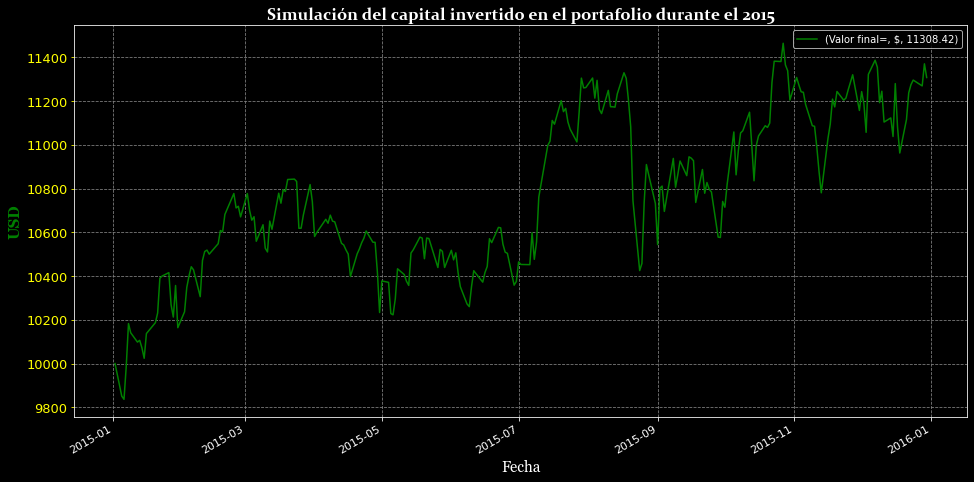

In [82]:
#### Comportamiento del Portafolio en el 2015
#Estética
plt.style.use('dark_background')
plt.rc('grid', linestyle="--", color='gray')
plt.rc('ytick', labelsize=13, color='yellow')
plt.rc('xtick', labelsize=11, color='white')

# Visualización
port_2015["Valor del portafolio"].plot(figsize = (16,8),color='g',
         label=('Valor final=','$',port_2015['Valor del portafolio'].iloc[-1].round(2)))
#Estética
plt.title("Simulación del capital invertido en el portafolio durante el 2015",size='17', weight='bold', family="Constantia")
plt.xlabel("Fecha",size='15', weight='roman', family="Georgia")
plt.ylabel("USD",size='15', weight='bold', family="Georgia", color='g')
plt.grid(True)
plt.legend(loc = "best")

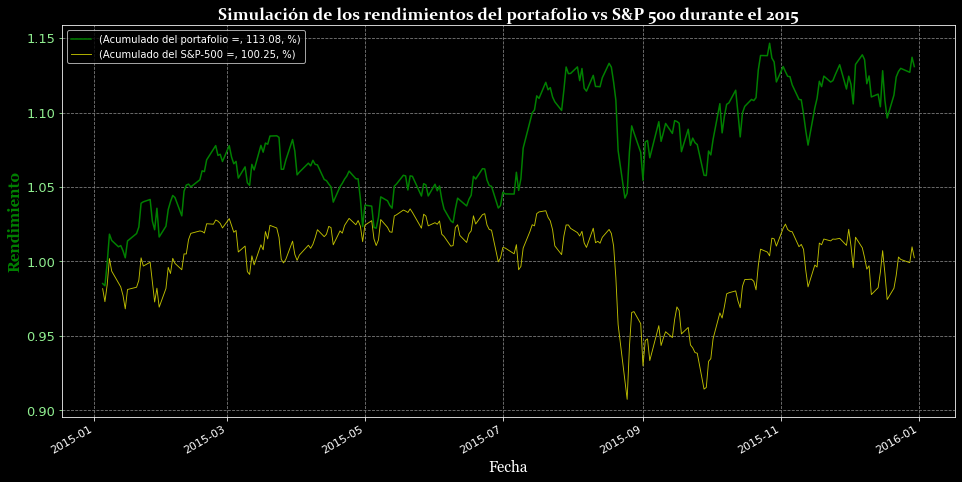

In [83]:
#Estética
plt.style.use('dark_background')
plt.rc('grid', linestyle="--", color='gray')
plt.rc('ytick', labelsize=13, color='lightgreen')
plt.rc('xtick', labelsize=11, color='white')

#  Benchmark (S&P-500)
benchmark = yf.download("^GSPC", start = "2015-01-01", end = "2015-12-31", progress = False)["Adj Close"]
benchmark = benchmark.pct_change().dropna()
br= (benchmark + 1).cumprod()

# Visualización
port_2015["Rendimiento acumulado"].plot(figsize = (16, 8), color='g',label = ('Acumulado del portafolio =',
         port_2015['Rendimiento acumulado'].iloc[-1].round(4)*100,'%'))
br.plot(label = ("Acumulado del S&P-500 =", br.iloc[-1].round(4)*100,'%'), color='y', linewidth=.9)

#Estética
plt.title("Simulación de los rendimientos del portafolio vs S&P 500 durante el 2015",size='17', weight='bold', family="Constantia")
plt.xlabel("Fecha",size='15', weight='roman', family="Georgia")
plt.ylabel("Rendimiento",size='15', weight='bold', family="Georgia", color='g')
plt.grid(True)
plt.legend(loc = "best")

### Métricas de Desempeño

#### Radio de Sharpe

Es el índice más común para comparar el retorno de la inversión con el riesgo, lo que nos permite ajustar los rendimientos de una inversión por la cantidad de riesgo que se asumió para lograrlo. La fórmula para calcular el Radio de Sharpe es la siguiente:

$$RS = \frac{R_P-rf}{\sigma}$$

$R_P$ : Rendimiento anual esperado del portafolio.

$rf$ : Tasa libre de riesgo anual.

$\sigma$ : Desviación estándar anualizada de los rendimientos del portafolio.

In [84]:
# Ratio de Sharpe
def sharpe_ratio(ret, t, rf):
    ret = ret.dropna()
    mean = ret.mean() * t - rf
    sigma = ret.std() * np.sqrt(t)
    return mean / sigma

#### Radio de Sortino

En este caso es casi la misma fórmula que el Radio de Sharpe, sólo que en la de Sortino únicamente se considera la varianza perjudicial de los rendimientos, esto para enfocarnos en cuánta rentabilidad esperamos obtener en función del riesgo, es decir, de las desviaciones negativas de la media que tiene nuestra inversión. Se calcula de la siguiente manera:

$$RSortino = \frac{R_P-rf}{\sigma^-}$$

$R_P$ : Rendimiento anual esperado del portafolio.

$rf$ : Tasa libre de riesgo anual.

$\sigma^-$: Desviación estándar anualizada de los rendimientos negativos del portafolio.

In [85]:
# Ratio de Sortino
def sortino_ratio(ret, t, rf):
    ret = ret.dropna()
    mean = ret.mean() * t - rf
    sigma_neg = ret[ret < 0].std() * np.sqrt(t)
    return mean / sigma_neg

In [86]:
t = 252
# Ratio de Sharpe
RS_2015 = sharpe_ratio(port_2015["Rendimientos"], t, rf)
# Ratio de Sortino
RSort_2015 = sortino_ratio(port_2015["Rendimientos"], t, rf)
# Rendimiento y volatilidad anuales
ret_total_2015 = (port_2015['Valor del portafolio'][-1] / port_2015['Valor del portafolio'][0]) - 1
s_total_2015 = port_2015["Rendimientos"].std() * np.sqrt(t)

# Resultados en Dataframe
summary_2015 = pd.DataFrame({'Ratio de Sharpe': RS_2015,'Ratio de Sortino': RSort_2015,
                           'Rendimiento total': ret_total_2015,'Volatilidad anual': s_total_2015}, index = ['Portafolio 2015'])
summary_2015



,Ratio de Sharpe,Ratio de Sortino,Rendimiento total,Volatilidad anual
Portafolio 2015,0.875727,1.374343,0.130842,0.151818


In [87]:
esperado_obtenido15 = pd.DataFrame({'RS % obtenido': (RS_2015/(pemv_summary['Ratio Sharpe']))*100, 
                                  'E(r) % obtenido': ((ret_total_2015/Er_pemv)*100),
                                  'σ % obtenida':((s_total_2015/s_pemv)*100)
                                 })
esperado_obtenido15

,RS % obtenido,E(r) % obtenido,σ % obtenida
Portafolio EMV,33.519721,41.060179,125.455016


## <font color = "black"> Portafolio de Inversión para el Año 2016 <font/>

### Teoría Moderna de Portafolios

In [88]:
# Acciones seleccionadas
stocks = ["ALK", "GOOGL", "AAPL", "BLK", "BA", "CB", "COST", "CVS", "GD", "GPC", "IFF", "JNJ", "LMT", "NOV", "NVDA", "ORCL", "ROK", "ROP", "TEL", "TXN"]
data = pd.DataFrame()

# Descarga masiva de precios históricos en temporalidad diaria
for ticker in stocks:
    data[ticker] = yf.download(ticker, start = "2012-12-31", end = "2015-12-31", progress = False)["Adj Close"]
    
# Caracterización de la distribución de los rendimientos
returns = data.pct_change().dropna()
mean_ret = returns.mean() * 252
cov = returns.cov() * 252
stocks_summary = pd.DataFrame({"Rendimiento" : mean_ret, "Volatilidad" : returns.std()*np.sqrt(252)})

# Treasury Yield Curve Rates 1Yr (2015-12-31) 
rf = 0.65 / (100)

# Datos necesarios para resolver los problemas de optimización
N = len(mean_ret)
w0 = np.ones(N) / N
bnds = ((0, None), ) * N
cons = {"type" : "eq", "fun" : lambda w : w.sum() - 1}

# Función a minimizar para encontrar el portafolio de mínima varianza
def Var(w, cov):
    return np.dot(w.T, np.dot(cov, w))

# Función a minimizar para encontrar el portafolio eficiente en media-varianza
def Minus_RatioSharpe(w, er, rf, cov):
    erp = np.dot(w.T, er)
    sp = np.dot(w.T, np.dot(cov, w))**0.5
    RS = (erp - rf) / sp
    return -RS

# Optimización con el módulo minimize
pmv = minimize(fun = Var, x0 = w0, args = (cov,), bounds = bnds, constraints = cons, tol = 1e-10)
pemv = minimize(fun = Minus_RatioSharpe, x0 = w0, args = (mean_ret, rf, cov), bounds = bnds, constraints = cons, tol = 1e-10)

In [89]:
# Ponderaciones del portafolio eficiente en media-varianza
w_pemv = pd.DataFrame(np.round(pemv.x.reshape(1, N), 4), columns = returns.columns, index = ["Ponderación"])
w_pemv[w_pemv <= 0.0] = np.nan
w_pemv.dropna(axis = 1, inplace = True)
w_pemv

,ALK,GOOGL,COST,CVS,LMT,NVDA
Ponderación,0.1475,0.0313,0.0397,0.1635,0.4704,0.1476


In [90]:
# Métricas del portafolio eficiente en media-varianza (anualizadas)
Er_pemv = np.dot(pemv.x.T, mean_ret)
s_pemv = (np.dot(pemv.x.T, np.dot(cov, pemv.x)))**0.5
rf = rf

pemv_summary = pd.DataFrame({"Rendimiento" : Er_pemv, "Volatilidad" : s_pemv,
                            "Ratio Sharpe" : (Er_pemv - rf) / s_pemv}, index = ["Portafolio EMV"])
pemv_summary

,Rendimiento,Volatilidad,Ratio Sharpe
Portafolio EMV,0.353806,0.149411,2.324503


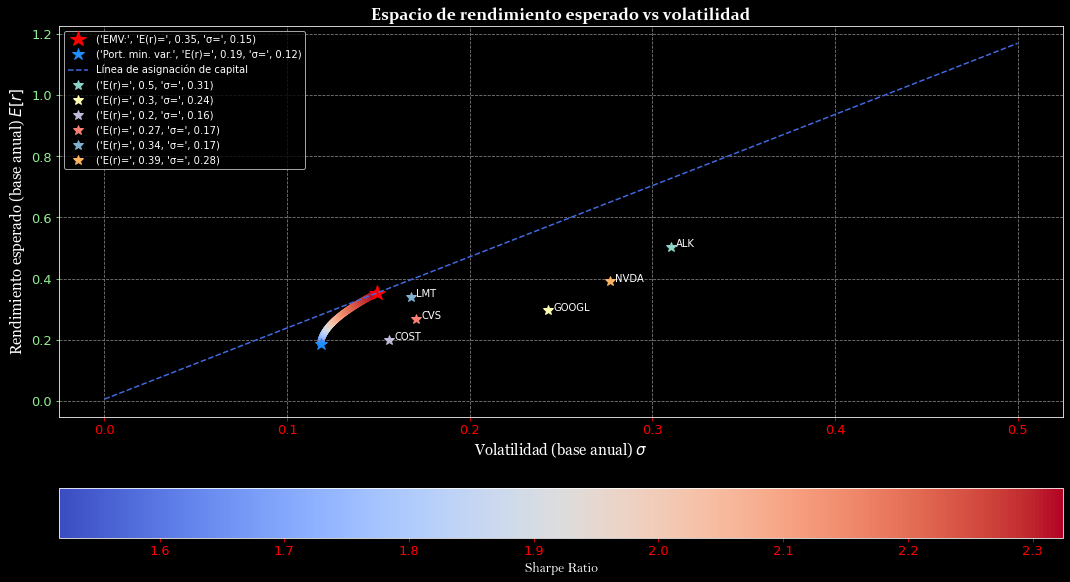

In [91]:
## Gráfico
#Estética
plt.style.use('dark_background')
plt.rc('grid', linestyle="--", color='gray')
plt.rc('ytick', labelsize=13, color='lightgreen')
plt.rc('xtick', labelsize=13, color='red')

# Frontera de mínima varianza
w = np.linspace(0, 1, 100)
Er_pmv = np.dot(pmv.x, mean_ret)
s_pmv = (np.dot(pmv.x.T, np.dot(cov, pmv.x)))**0.5
cov_pmv_pemv = np.dot(pmv.x.T, np.dot(cov, pemv.x))
minvar_frontier = pd.DataFrame({"Volatilidad" : ((w*s_pemv)**2 + 2*w*(1-w)*cov_pmv_pemv + ((1-w)*s_pmv)**2)**0.5, 
                                "Rendimiento" : w*Er_pemv + (1 - w)*Er_pmv})
minvar_frontier["Ratio Sharpe"] = (minvar_frontier["Rendimiento"] - rf) / minvar_frontier["Volatilidad"]

# LAC (Línea de Asignación de Capital)
sp = np.linspace(0, 0.5)
lac = pd.DataFrame({"Volatilidad" : sp, "Rendimiento" : pemv_summary["Ratio Sharpe"].values[0]*sp + rf})

# Visualización
plt.figure(figsize = (18, 10))
# Portafolio eficiente en media-varianza
plt.plot(s_pemv, Er_pemv, "*r", ms=16, label = ("EMV:", 'E(r)=',Er_pemv.round(2),'σ=',s_pemv.round(2)))
# Portafolio de mínima varianza
plt.plot(s_pmv, Er_pmv, "*b", ms=13, color = "dodgerblue",
         label = ("Port. min. var.", 'E(r)=',Er_pmv.round(2),'σ=',s_pmv.round(2)))
# LAC
plt.plot(lac["Volatilidad"], lac["Rendimiento"], "--", color = "royalblue", label = "Línea de asignación de capital")
# Frontera de mínima varianza
plt.scatter(minvar_frontier["Volatilidad"], minvar_frontier["Rendimiento"],
            c = minvar_frontier["Ratio Sharpe"], cmap = "coolwarm")
plt.colorbar(orientation = "horizontal", pad=0.13).set_label(label='Sharpe Ratio',size='14', weight='roman', family="Bell MT")

# Activos individuales
for i in range(len(stocks_summary)):
    if stocks_summary.index[i] in w_pemv.columns:
        plt.plot(stocks_summary.iloc[i, 1], stocks_summary.iloc[i, 0], "*", ms=10, label=('E(r)=',
        stocks_summary.iloc[i, 0].round(2),'σ=',stocks_summary.iloc[i, 1].round(2)))

        plt.text(stocks_summary.iloc[i, 1] + 0.003, stocks_summary.iloc[i, 0], stocks_summary.index[i])
#Estética
plt.title("Espacio de rendimiento esperado vs volatilidad",size='17', weight='bold', family="Constantia")
plt.xlabel("Volatilidad (base anual) $\sigma$",size='15', weight='roman', family="Georgia")
plt.ylabel("Rendimiento esperado (base anual) $E[r]$",size='15', weight='roman', family="Georgia")
plt.grid(True)
plt.legend(loc = "best")

In [92]:
## Asignación óptima del capital
# Se encuentra el coeficiente de aversión al riesgo de tal forma que todo el capital se asigne a los activos riesgosos
lambda_coef = (Er_pemv - rf) / (s_pemv**2) 
w_opt = (Er_pemv - rf) / (lambda_coef * s_pemv**2)

capital_allo = pd.DataFrame({"Aversión al riesgo" : lambda_coef,
                             "Activos riesgosos" : w_opt,
                             "Activo libre de riesgo" : 1-w_opt}, index = ["Asignación óptima de capital"]) 
capital_allo

,Aversión al riesgo,Activos riesgosos,Activo libre de riesgo
Asignación óptima de capital,15.557792,1.0,0.0


### Desempeño del Portafolio Eficiente en Media-Varianza en 2016

In [93]:
## Inversión en el portafolio eficiente en media-varianza
# Acciones cuya ponderación arrojada por el optimizador es mayor a 0
stocks = list(w_pemv.columns)
# Capital inicial
capital = port_2015["Valor del portafolio"][-1]
data = pd.DataFrame()  

# Descarga masiva de históricos para simular el comportamiento del portafolio durante el año 2016
for ticker in stocks:
    data[ticker] = yf.download(ticker, start = "2016-01-01", end = "2016-12-31", progress = False)["Adj Close"]
    
# Precios iniciales a los que se compra cada acción
p_0 = np.array(data.iloc[0,:])
# Capital invertido en cada acción
w = capital * w_pemv.iloc[0].values
# Número de acciones compradas
n_stocks = np.floor(w / p_0)

# Portafolio 
port_2016 = pd.DataFrame(data * n_stocks)
port_2016["Valor del portafolio"] = port_2016.sum(axis=1)

# Dinero en efectivo
cash = capital - port_2016["Valor del portafolio"][0]
port_2016["Valor del portafolio"] = port_2016["Valor del portafolio"] + cash

#Rendimientos diarios y acumulado del portafolio
port_2016["Rendimientos"] = port_2016["Valor del portafolio"].pct_change()
port_2016["Rendimiento acumulado"] = (port_2016["Rendimientos"] + 1).cumprod()
port_2016.head()

,ALK,GOOGL,COST,CVS,LMT,NVDA,Valor del portafolio,Rendimientos,Rendimiento acumulado
Date,,,,,,,,,
2016-01-04,1662.179214,0.0,436.791138,1767.083862,5280.236633,1647.447891,11308.417761,NaN,NaN
2016-01-05,1634.406265,0.0,437.858826,1772.213219,5405.303528,1673.912857,11438.373716,0.011492,1.011492
2016-01-06,1657.939011,0.0,433.806931,1750.596542,5389.700073,1604.696426,11351.418005,-0.007602,1.003802
2016-01-07,1568.682053,0.0,423.868652,1725.315857,5282.216919,1541.078827,11055.841330,-0.026039,0.977665
2016-01-08,1492.145706,0.0,416.449219,1713.957893,5272.806824,1507.997520,10918.036184,-0.012464,0.965479


In [94]:
port_2016.tail()

,ALK,GOOGL,COST,CVS,LMT,NVDA,Valor del portafolio,Rendimientos,Rendimiento acumulado
Date,,,,,,,,,
2016-12-23,1948.069572,0.0,448.840988,1476.015358,6356.888672,5640.884003,16385.377615,0.005563,1.448954
2016-12-27,1950.438675,0.0,448.757950,1478.812912,6389.235046,6028.315979,16810.239584,0.025929,1.486524
2016-12-28,1910.585602,0.0,445.877838,1474.150108,6356.634460,5613.651764,16315.578794,-0.029426,1.442782
2016-12-29,1907.138725,0.0,446.210175,1473.404297,6382.359375,5725.667267,16449.458860,0.008206,1.454621
2016-12-30,1911.447365,0.0,443.385544,1471.725861,6365.803589,5484.677307,16191.718687,-0.015669,1.431829


#### Comportamiento del Portafolio en el 2016

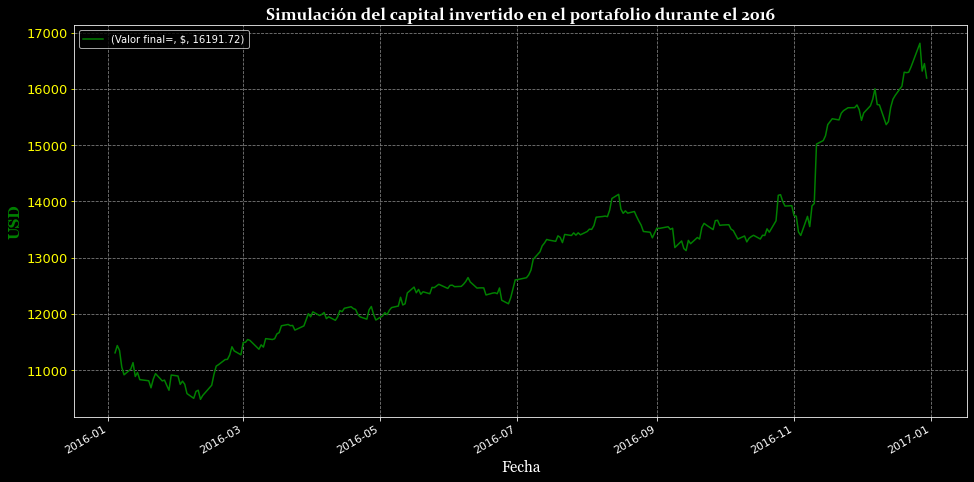

In [95]:
#Estética
plt.style.use('dark_background')
plt.rc('grid', linestyle="--", color='gray')
plt.rc('ytick', labelsize=13, color='yellow')
plt.rc('xtick', labelsize=11, color='white')

# Visualización
port_2016["Valor del portafolio"].plot(figsize = (16,8),color='g',
         label=('Valor final=','$',port_2016['Valor del portafolio'].iloc[-1].round(2)))
#Estética
plt.title("Simulación del capital invertido en el portafolio durante el 2016",size='17', weight='bold', family="Constantia")
plt.xlabel("Fecha",size='15', weight='roman', family="Georgia")
plt.ylabel("USD",size='15', weight='bold', family="Georgia", color='g')
plt.grid(True)
plt.legend(loc = "best")

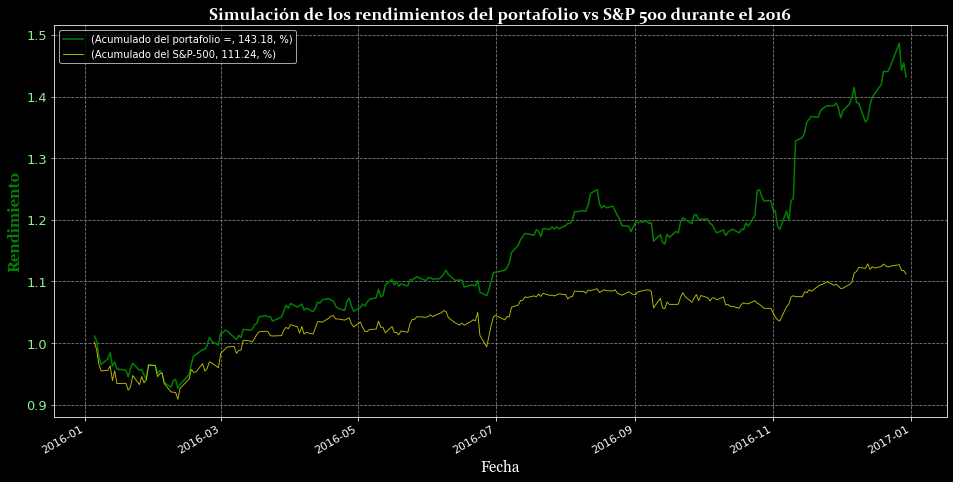

In [96]:
#Estética
plt.style.use('dark_background')
plt.rc('grid', linestyle="--", color='gray')
plt.rc('ytick', labelsize=13, color='lightgreen')
plt.rc('xtick', labelsize=11, color='white')

#  Benchmark (S&P-500)
benchmark = yf.download("^GSPC", start = "2016-01-01", end = "2016-12-31", progress = False)["Adj Close"]
benchmark = benchmark.pct_change().dropna()
br= (benchmark + 1).cumprod()

# Visualización
port_2016["Rendimiento acumulado"].plot(figsize = (16, 8), color='g',label = ('Acumulado del portafolio =',
         (port_2016['Rendimiento acumulado'].iloc[-1]*100).round(2),'%'))
br.plot(label = ("Acumulado del S&P-500", (br.iloc[-1]*100).round(2),'%'), color='y', linewidth=.9)

#Estética
plt.title("Simulación de los rendimientos del portafolio vs S&P 500 durante el 2016",size='17', weight='bold', family="Constantia")
plt.xlabel("Fecha",size='15', weight='roman', family="Georgia")
plt.ylabel("Rendimiento",size='15', weight='bold', family="Georgia", color='g')
plt.grid(True)
plt.legend(loc = "best")

### Métricas de Desempeño

In [97]:
# Ratio de Sharpe
RS_2016 = sharpe_ratio(port_2016["Rendimientos"], t, rf)
# Ratio de Sortino
RSort_2016 = sortino_ratio(port_2016["Rendimientos"], t, rf)
# Rendimiento y volatilidad anuales
ret_total_2016 = (port_2016['Valor del portafolio'][-1] / port_2016['Valor del portafolio'][0]) - 1
s_total_2016 = port_2016["Rendimientos"].std() * np.sqrt(t)

# Resultados en Dataframe
summary_2016 = pd.DataFrame({'Ratio de Sharpe': RS_2016,'Ratio de Sortino': RSort_2016,
                           'Rendimiento total': ret_total_2016,'Volatilidad anual': s_total_2016}, index = ['Portafolio 2016'])
summary_2016

,Ratio de Sharpe,Ratio de Sortino,Rendimiento total,Volatilidad anual
Portafolio 2016,2.244895,3.764749,0.431829,0.163634


In [99]:
esperado_obtenido16 = pd.DataFrame({'RS % obtenido': (RS_2016/(pemv_summary['Ratio Sharpe']))*100, 
                                  'E(r) % obtenido': ((ret_total_2016/Er_pemv)*100),
                                  'σ % obtenida':((s_total_2016/s_pemv)*100)
                                 })
esperado_obtenido16

,RS % obtenido,E(r) % obtenido,σ % obtenida
Portafolio EMV,96.575254,122.052414,109.519212


## <font color = "black"> Portafolio de Inversión para el Año 2017 <font/>

### Teoría Moderna de Portafolios

In [100]:
# Acciones seleccionadas
stocks = ["ALK", "GOOGL", "AAPL", "BLK", "BA", "CB", "COST", "CVS", "GD", "GPC", "IFF", "JNJ", "LMT", "NOV", "NVDA", "ORCL", "ROK", "ROP", "TEL", "TXN"]
data = pd.DataFrame()

# Descarga masiva de precios históricos en temporalidad diaria
for ticker in stocks:
    data[ticker] = yf.download(ticker, start = "2013-12-31", end = "2016-12-31", progress = False)["Adj Close"]
    
# Caracterización de la distribución de los rendimientos
returns = data.pct_change().dropna()
mean_ret = returns.mean() * 252
cov = returns.cov() * 252
stocks_summary = pd.DataFrame({"Rendimiento" : mean_ret, "Volatilidad" : returns.std()*np.sqrt(252)})

# Treasury Yield Curve Rates 1Yr (2016-12-31) 
rf = 0.85 / (100)

# Datos necesarios para resolver los problemas de optimización
N = len(mean_ret)
w0 = np.ones(N) / N
bnds = ((0, None), ) * N
cons = {"type" : "eq", "fun" : lambda w : w.sum() - 1}

# Función a minimizar para encontrar el portafolio de mínima varianza
def Var(w, cov):
    return np.dot(w.T, np.dot(cov, w))

# Función a minimizar para encontrar el portafolio eficiente en media-varianza
def Minus_RatioSharpe(w, er, rf, cov):
    erp = np.dot(w.T, er)
    sp = np.dot(w.T, np.dot(cov, w))**0.5
    RS = (erp - rf) / sp
    return -RS

# Optimización con el módulo minimize
pmv = minimize(fun = Var, x0 = w0, args = (cov,), bounds = bnds, constraints = cons, tol = 1e-10)
pemv = minimize(fun = Minus_RatioSharpe, x0 = w0, args = (mean_ret, rf, cov), bounds = bnds, constraints = cons, tol = 1e-10)

In [101]:
# Ponderaciones del portafolio eficiente en media-varianza
w_pemv = pd.DataFrame(np.round(pemv.x.reshape(1, N), 4), columns = returns.columns, index = ["Ponderación"])
w_pemv[w_pemv <= 0.0] = np.nan
w_pemv.dropna(axis = 1, inplace = True)
w_pemv

,ALK,GD,LMT,NVDA
Ponderación,0.1494,0.0923,0.3372,0.4211


In [102]:
# Métricas del portafolio eficiente en media-varianza (anualizadas)
Er_pemv = np.dot(pemv.x.T, mean_ret)
s_pemv = (np.dot(pemv.x.T, np.dot(cov, pemv.x)))**0.5
rf = rf

pemv_summary = pd.DataFrame({"Rendimiento" : Er_pemv, "Volatilidad" : s_pemv,
                            "Ratio Sharpe" : (Er_pemv - rf) / s_pemv}, index = ["Portafolio EMV"])
pemv_summary

,Rendimiento,Volatilidad,Ratio Sharpe
Portafolio EMV,0.448948,0.206788,2.129949


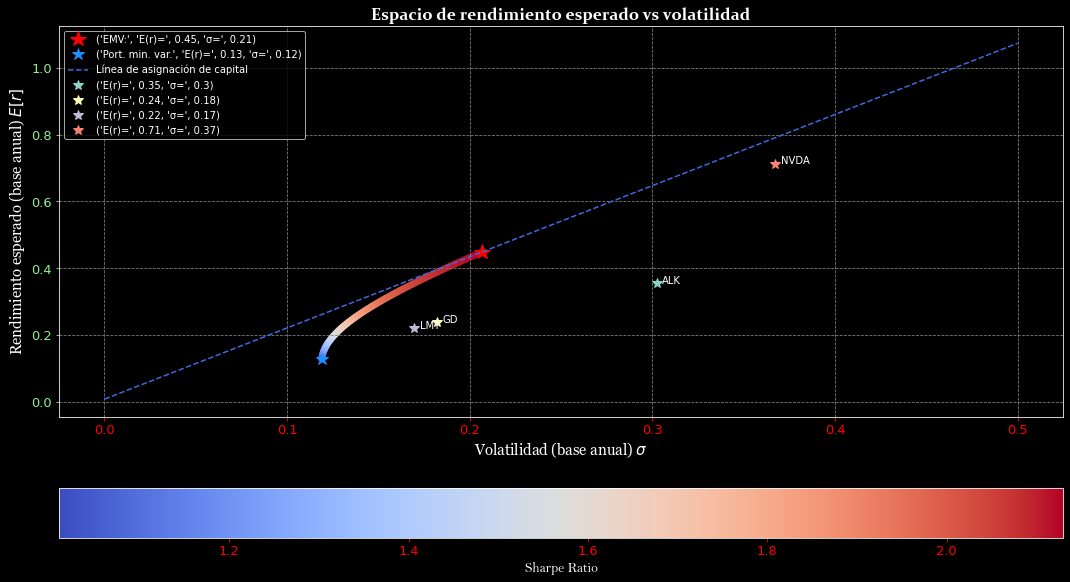

In [103]:
## Gráfico
#Estética
plt.style.use('dark_background')
plt.rc('grid', linestyle="--", color='gray')
plt.rc('ytick', labelsize=13, color='lightgreen')
plt.rc('xtick', labelsize=13, color='red')

# Frontera de mínima varianza
w = np.linspace(0, 1, 100)
Er_pmv = np.dot(pmv.x, mean_ret)
s_pmv = (np.dot(pmv.x.T, np.dot(cov, pmv.x)))**0.5
cov_pmv_pemv = np.dot(pmv.x.T, np.dot(cov, pemv.x))
minvar_frontier = pd.DataFrame({"Volatilidad" : ((w*s_pemv)**2 + 2*w*(1-w)*cov_pmv_pemv + ((1-w)*s_pmv)**2)**0.5, 
                                "Rendimiento" : w*Er_pemv + (1 - w)*Er_pmv})
minvar_frontier["Ratio Sharpe"] = (minvar_frontier["Rendimiento"] - rf) / minvar_frontier["Volatilidad"]

# LAC (Línea de Asignación de Capital)
sp = np.linspace(0, 0.5)
lac = pd.DataFrame({"Volatilidad" : sp, "Rendimiento" : pemv_summary["Ratio Sharpe"].values[0]*sp + rf})

# Visualización
plt.figure(figsize = (18, 10))
# Portafolio eficiente en media-varianza
plt.plot(s_pemv, Er_pemv, "*r", ms=16, label = ("EMV:", 'E(r)=',Er_pemv.round(2),'σ=',s_pemv.round(2)))
# Portafolio de mínima varianza
plt.plot(s_pmv, Er_pmv, "*b", ms=13, color = "dodgerblue",
         label = ("Port. min. var.", 'E(r)=',Er_pmv.round(2),'σ=',s_pmv.round(2)))
# LAC
plt.plot(lac["Volatilidad"], lac["Rendimiento"], "--", color = "royalblue", label = "Línea de asignación de capital")
# Frontera de mínima varianza
plt.scatter(minvar_frontier["Volatilidad"], minvar_frontier["Rendimiento"],
            c = minvar_frontier["Ratio Sharpe"], cmap = "coolwarm")
plt.colorbar(orientation = "horizontal", pad=0.13).set_label(label='Sharpe Ratio',size='14', weight='roman', family="Bell MT")

# Activos individuales
for i in range(len(stocks_summary)):
    if stocks_summary.index[i] in w_pemv.columns:
        plt.plot(stocks_summary.iloc[i, 1], stocks_summary.iloc[i, 0], "*", ms=10, label=('E(r)=',
        stocks_summary.iloc[i, 0].round(2),'σ=',stocks_summary.iloc[i, 1].round(2)))

        plt.text(stocks_summary.iloc[i, 1] + 0.003, stocks_summary.iloc[i, 0], stocks_summary.index[i])
#Estética
plt.title("Espacio de rendimiento esperado vs volatilidad",size='17', weight='bold', family="Constantia")
plt.xlabel("Volatilidad (base anual) $\sigma$",size='15', weight='roman', family="Georgia")
plt.ylabel("Rendimiento esperado (base anual) $E[r]$",size='15', weight='roman', family="Georgia")
plt.grid(True)
plt.legend(loc = "best")

In [104]:
## Asignación óptima del capital
# Se encuentra el coeficiente de aversión al riesgo de tal forma que todo el capital se asigne a los activos riesgosos
lambda_coef = (Er_pemv - rf) / (s_pemv**2) 
w_opt = (Er_pemv - rf) / (lambda_coef * s_pemv**2)

capital_allo = pd.DataFrame({"Aversión al riesgo" : lambda_coef,
                             "Activos riesgosos" : w_opt,
                             "Activo libre de riesgo" : 1-w_opt}, index = ["Asignación óptima de capital"]) 
capital_allo

,Aversión al riesgo,Activos riesgosos,Activo libre de riesgo
Asignación óptima de capital,10.300153,1.0,0.0


### Desempeño del Portafolio Eficiente en Media-Varianza en 2017

In [105]:
## Inversión en el portafolio eficiente en media-varianza
# Acciones cuya ponderación arrojada por el optimizador es mayor a 0
stocks = list(w_pemv.columns)
# Capital inicial
capital = port_2016["Valor del portafolio"][-1]
data = pd.DataFrame()  

# Descarga masiva de históricos para simular el comportamiento del portafolio durante el año 2016
for ticker in stocks:
    data[ticker] = yf.download(ticker, start = "2017-01-01", end = "2017-12-31", progress = False)["Adj Close"]
    
# Precios iniciales a los que se compra cada acción
p_0 = np.array(data.iloc[0,:])
# Capital invertido en cada acción
w = capital * w_pemv.iloc[0].values
# Número de acciones compradas
n_stocks = np.floor(w / p_0)

# Portafolio 
port_2017 = pd.DataFrame(data * n_stocks)
port_2017["Valor del portafolio"] = port_2017.sum(axis=1)

# Dinero en efectivo
cash = capital - port_2017["Valor del portafolio"][0]
port_2017["Valor del portafolio"] = port_2017["Valor del portafolio"] + cash

#Rendimientos diarios y acumulado del portafolio
port_2017["Rendimientos"] = port_2017["Valor del portafolio"].pct_change()
port_2017["Rendimiento acumulado"] = (port_2017["Rendimientos"] + 1).cumprod()
port_2017.head()

,ALK,GD,LMT,NVDA,Valor del portafolio,Rendimientos,Rendimiento acumulado
Date,,,,,,,
2017-01-03,2390.257385,1447.835587,5299.557831,6753.643654,16191.718687,NaN,NaN
2017-01-04,2422.308456,1448.578537,5313.784027,6911.212654,16396.307905,0.012635,1.012635
2017-01-05,2383.738403,1453.529526,5355.416779,6735.768570,16228.877508,-0.010211,1.002295
2017-01-06,2362.552376,1464.422607,5394.540222,6825.807999,16347.747435,0.007325,1.009636
2017-01-09,2375.861816,1452.952194,5393.703201,7102.547974,16625.489416,0.016990,1.026790


In [106]:
port_2017.tail()

,ALK,GD,LMT,NVDA,Valor del portafolio,Rendimientos,Rendimiento acumulado
Date,,,,,,,
2017-12-22,2054.466095,1700.902496,6825.299133,12978.355759,23859.447714,-0.001389,1.473559
2017-12-26,2069.955093,1695.278732,6835.601685,13122.581192,24023.840933,0.006890,1.483712
2017-12-27,2056.955849,1701.573898,6855.560333,13104.636078,24019.150389,-0.000195,1.483422
2017-12-28,2062.486938,1711.143127,6912.646210,13119.923111,24106.623617,0.003642,1.488824
2017-12-29,2033.169662,1707.701248,6890.112274,12860.715225,23792.122641,-0.013046,1.469401


#### Comportamiento del Portafolio en el 2017

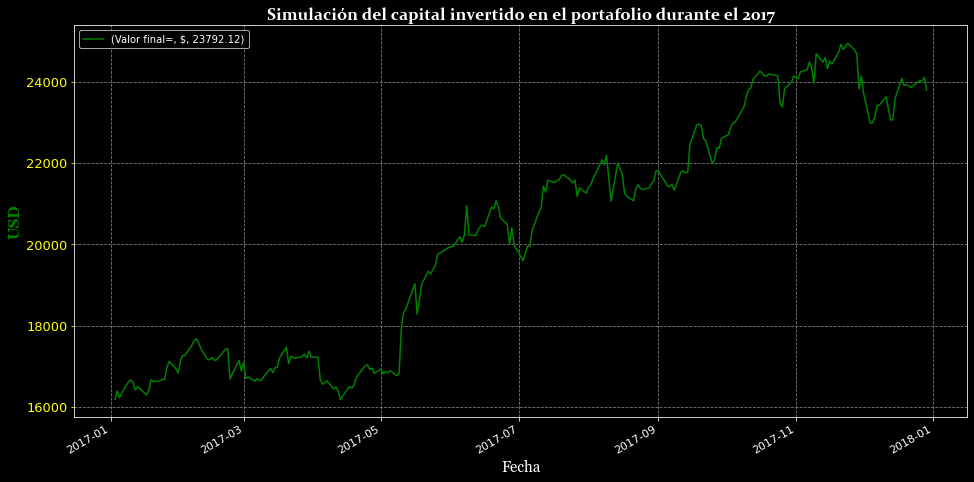

In [107]:
#Estética
plt.style.use('dark_background')
plt.rc('grid', linestyle="--", color='gray')
plt.rc('ytick', labelsize=13, color='yellow')
plt.rc('xtick', labelsize=11, color='white')

# Visualización
port_2017["Valor del portafolio"].plot(figsize = (16,8),color='g',
         label=('Valor final=','$',port_2017['Valor del portafolio'].iloc[-1].round(2)))
#Estética
plt.title("Simulación del capital invertido en el portafolio durante el 2017",size='17', weight='bold', family="Constantia")
plt.xlabel("Fecha",size='15', weight='roman', family="Georgia")
plt.ylabel("USD",size='15', weight='bold', family="Georgia", color='g')
plt.grid(True)
plt.legend(loc = "best")

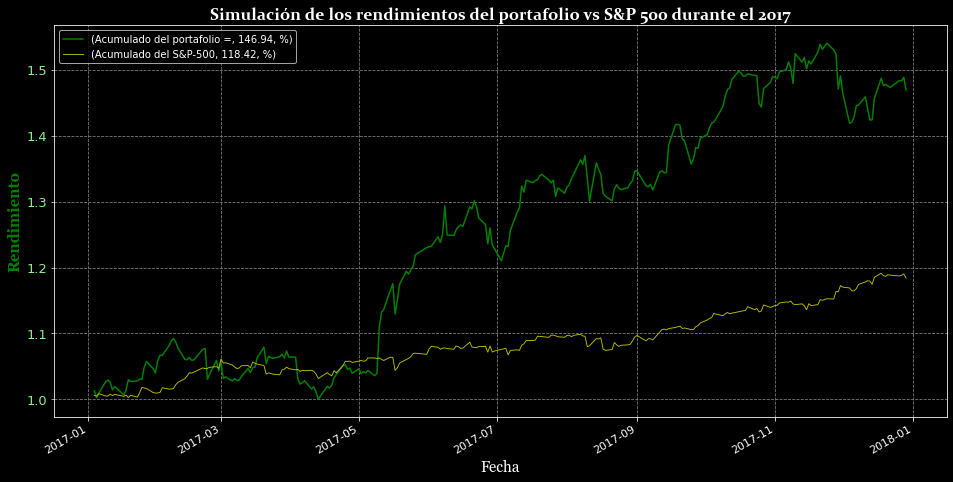

In [108]:
#Estética
plt.style.use('dark_background')
plt.rc('grid', linestyle="--", color='gray')
plt.rc('ytick', labelsize=13, color='lightgreen')
plt.rc('xtick', labelsize=11, color='white')

#  Benchmark (S&P-500)
benchmark = yf.download("^GSPC", start = "2017-01-01", end = "2017-12-31", progress = False)["Adj Close"]
benchmark = benchmark.pct_change().dropna()
br= (benchmark + 1).cumprod()

# Visualización
port_2017["Rendimiento acumulado"].plot(figsize = (16, 8), color='g',label = ('Acumulado del portafolio =',
         (port_2017['Rendimiento acumulado'].iloc[-1]*100).round(2),'%'))
br.plot(label = ("Acumulado del S&P-500", (br.iloc[-1]*100).round(2),'%'), color='y', linewidth=.9)

#Estética
plt.title("Simulación de los rendimientos del portafolio vs S&P 500 durante el 2017",size='17', weight='bold', family="Constantia")
plt.xlabel("Fecha",size='15', weight='roman', family="Georgia")
plt.ylabel("Rendimiento",size='15', weight='bold', family="Georgia", color='g')
plt.grid(True)
plt.legend(loc = "best")

### Métricas de Desempeño

In [109]:
# Ratio de Sharpe
RS_2017 = sharpe_ratio(port_2017["Rendimientos"], t, rf)
# Ratio de Sortino
RSort_2017 = sortino_ratio(port_2017["Rendimientos"], t, rf)
# Rendimiento y volatilidad anuales
ret_total_2017 = (port_2017['Valor del portafolio'][-1] / port_2017['Valor del portafolio'][0]) - 1
s_total_2017 = port_2017["Rendimientos"].std() * np.sqrt(t)

# Resultados en Dataframe
summary_2017 = pd.DataFrame({'Ratio de Sharpe': RS_2017,'Ratio de Sortino': RSort_2017,
                           'Rendimiento total': ret_total_2017,'Volatilidad anual': s_total_2017}, index = ['Portafolio 2017'])
summary_2017

,Ratio de Sharpe,Ratio de Sortino,Rendimiento total,Volatilidad anual
Portafolio 2017,1.929469,2.668093,0.469401,0.207943


In [111]:
esperado_obtenido17 = pd.DataFrame({'RS % obtenido': (RS_2017/(pemv_summary['Ratio Sharpe']))*100, 
                                  'E(r) % obtenido': ((ret_total_2017/Er_pemv)*100),
                                  'σ % obtenida':((s_total_2017/s_pemv)*100)
                                 })
esperado_obtenido17

,RS % obtenido,E(r) % obtenido,σ % obtenida
Portafolio EMV,90.587592,104.555673,100.558584


## <font color = "black"> Portafolio de Inversión para el Año 2018 <font/>

### Teoría Moderna de Portafolios

In [112]:
# Acciones seleccionadas
stocks = ["ALK", "GOOGL", "AAPL", "BLK", "BA", "CB", "COST", "CVS", "GD", "GPC", "IFF", "JNJ", "LMT", "NOV", "NVDA", "ORCL", "ROK", "ROP", "TEL", "TXN"]
data = pd.DataFrame()

# Descarga masiva de precios históricos en temporalidad diaria
for ticker in stocks:
    data[ticker] = yf.download(ticker, start = "2014-12-31", end = "2017-12-31", progress = False)["Adj Close"]
    
# Caracterización de la distribución de los rendimientos
returns = data.pct_change().dropna()
mean_ret = returns.mean() * 252
cov = returns.cov() * 252
stocks_summary = pd.DataFrame({"Rendimiento" : mean_ret, "Volatilidad" : returns.std()*np.sqrt(252)})

# Treasury Yield Curve Rates 1Yr (2017-12-31) 
rf = 1.76 / (100)

# Datos necesarios para resolver los problemas de optimización
N = len(mean_ret)
w0 = np.ones(N) / N
bnds = ((0, None), ) * N
cons = {"type" : "eq", "fun" : lambda w : w.sum() - 1}

# Función a minimizar para encontrar el portafolio de mínima varianza
def Var(w, cov):
    return np.dot(w.T, np.dot(cov, w))

# Función a minimizar para encontrar el portafolio eficiente en media-varianza
def Minus_RatioSharpe(w, er, rf, cov):
    erp = np.dot(w.T, er)
    sp = np.dot(w.T, np.dot(cov, w))**0.5
    RS = (erp - rf) / sp
    return -RS

# Optimización con el módulo minimize
pmv = minimize(fun = Var, x0 = w0, args = (cov,), bounds = bnds, constraints = cons, tol = 1e-10)
pemv = minimize(fun = Minus_RatioSharpe, x0 = w0, args = (mean_ret, rf, cov), bounds = bnds, constraints = cons, tol = 1e-10)

In [113]:
# Ponderaciones del portafolio eficiente en media-varianza
w_pemv = pd.DataFrame(np.round(pemv.x.reshape(1, N), 4), columns = returns.columns, index = ["Ponderación"])
w_pemv[w_pemv <= 0.0] = np.nan
w_pemv.dropna(axis = 1, inplace = True)
w_pemv

,GOOGL,BA,COST,LMT,NVDA
Ponderación,0.0913,0.3167,0.0009,0.2431,0.348


In [114]:
# Métricas del portafolio eficiente en media-varianza (anualizadas)
Er_pemv = np.dot(pemv.x.T, mean_ret)
s_pemv = (np.dot(pemv.x.T, np.dot(cov, pemv.x)))**0.5
rf = rf

pemv_summary = pd.DataFrame({"Rendimiento" : Er_pemv, "Volatilidad" : s_pemv,
                            "Ratio Sharpe" : (Er_pemv - rf) / s_pemv}, index = ["Portafolio EMV"])
pemv_summary

,Rendimiento,Volatilidad,Ratio Sharpe
Portafolio EMV,0.47313,0.1957,2.327698


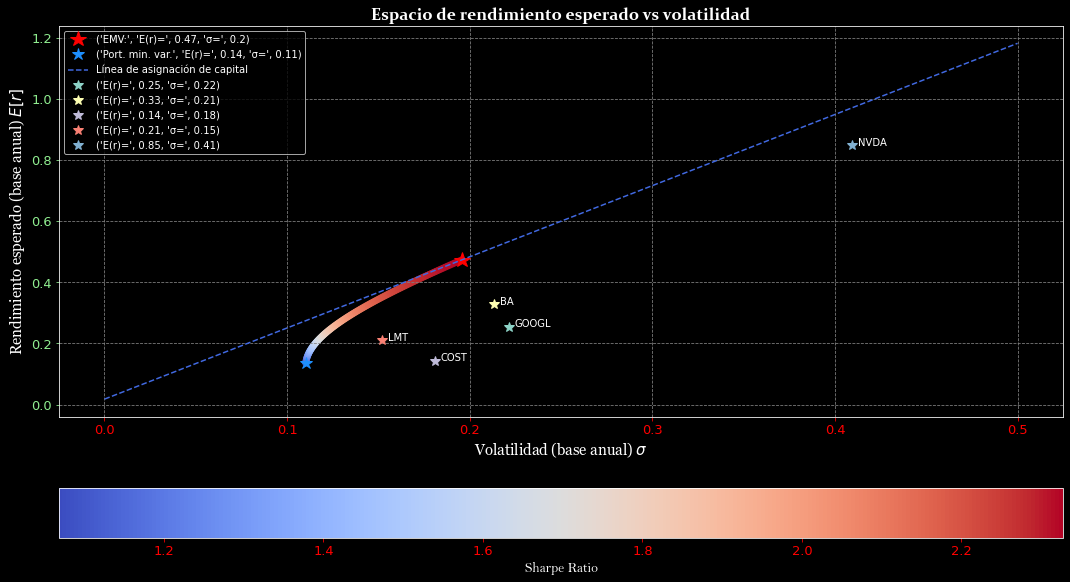

In [115]:
## Gráfico
#Estética
plt.style.use('dark_background')
plt.rc('grid', linestyle="--", color='gray')
plt.rc('ytick', labelsize=13, color='lightgreen')
plt.rc('xtick', labelsize=13, color='red')

# Frontera de mínima varianza
w = np.linspace(0, 1, 100)
Er_pmv = np.dot(pmv.x, mean_ret)
s_pmv = (np.dot(pmv.x.T, np.dot(cov, pmv.x)))**0.5
cov_pmv_pemv = np.dot(pmv.x.T, np.dot(cov, pemv.x))
minvar_frontier = pd.DataFrame({"Volatilidad" : ((w*s_pemv)**2 + 2*w*(1-w)*cov_pmv_pemv + ((1-w)*s_pmv)**2)**0.5, 
                                "Rendimiento" : w*Er_pemv + (1 - w)*Er_pmv})
minvar_frontier["Ratio Sharpe"] = (minvar_frontier["Rendimiento"] - rf) / minvar_frontier["Volatilidad"]

# LAC (Línea de Asignación de Capital)
sp = np.linspace(0, 0.5)
lac = pd.DataFrame({"Volatilidad" : sp, "Rendimiento" : pemv_summary["Ratio Sharpe"].values[0]*sp + rf})

# Visualización
plt.figure(figsize = (18, 10))
# Portafolio eficiente en media-varianza
plt.plot(s_pemv, Er_pemv, "*r", ms=16, label = ("EMV:", 'E(r)=',Er_pemv.round(2),'σ=',s_pemv.round(2)))
# Portafolio de mínima varianza
plt.plot(s_pmv, Er_pmv, "*b", ms=13, color = "dodgerblue",
         label = ("Port. min. var.", 'E(r)=',Er_pmv.round(2),'σ=',s_pmv.round(2)))
# LAC
plt.plot(lac["Volatilidad"], lac["Rendimiento"], "--", color = "royalblue", label = "Línea de asignación de capital")
# Frontera de mínima varianza
plt.scatter(minvar_frontier["Volatilidad"], minvar_frontier["Rendimiento"],
            c = minvar_frontier["Ratio Sharpe"], cmap = "coolwarm")
plt.colorbar(orientation = "horizontal", pad=0.13).set_label(label='Sharpe Ratio',size='14', weight='roman', family="Bell MT")

# Activos individuales
for i in range(len(stocks_summary)):
    if stocks_summary.index[i] in w_pemv.columns:
        plt.plot(stocks_summary.iloc[i, 1], stocks_summary.iloc[i, 0], "*", ms=10, label=('E(r)=',
        stocks_summary.iloc[i, 0].round(2),'σ=',stocks_summary.iloc[i, 1].round(2)))

        plt.text(stocks_summary.iloc[i, 1] + 0.003, stocks_summary.iloc[i, 0], stocks_summary.index[i])
#Estética
plt.title("Espacio de rendimiento esperado vs volatilidad",size='17', weight='bold', family="Constantia")
plt.xlabel("Volatilidad (base anual) $\sigma$",size='15', weight='roman', family="Georgia")
plt.ylabel("Rendimiento esperado (base anual) $E[r]$",size='15', weight='roman', family="Georgia")
plt.grid(True)
plt.legend(loc = "best")

In [116]:
## Asignación óptima del capital
# Se encuentra el coeficiente de aversión al riesgo de tal forma que todo el capital se asigne a los activos riesgosos
lambda_coef = (Er_pemv - rf) / (s_pemv**2) 
w_opt = (Er_pemv - rf) / (lambda_coef * s_pemv**2)

capital_allo = pd.DataFrame({"Aversión al riesgo" : lambda_coef,
                             "Activos riesgosos" : w_opt,
                             "Activo libre de riesgo" : 1-w_opt}, index = ["Asignación óptima de capital"]) 
capital_allo

,Aversión al riesgo,Activos riesgosos,Activo libre de riesgo
Asignación óptima de capital,11.894243,1.0,0.0


### Desempeño del Portafolio Eficiente en Media-Varianza en 2018

In [117]:
## Inversión en el portafolio eficiente en media-varianza
# Acciones cuya ponderación arrojada por el optimizador es mayor a 0
stocks = list(w_pemv.columns)
# Capital inicial
capital = port_2017["Valor del portafolio"][-1]
data = pd.DataFrame()  

# Descarga masiva de históricos para simular el comportamiento del portafolio durante el año 2016
for ticker in stocks:
    data[ticker] = yf.download(ticker, start = "2018-01-01", end = "2018-12-31", progress = False)["Adj Close"]
    
# Precios iniciales a los que se compra cada acción
p_0 = np.array(data.iloc[0,:])
# Capital invertido en cada acción
w = capital * w_pemv.iloc[0].values
# Número de acciones compradas
n_stocks = np.floor(w / p_0)

# Portafolio 
port_2018 = pd.DataFrame(data * n_stocks)
port_2018["Valor del portafolio"] = port_2018.sum(axis=1)

# Dinero en efectivo
cash = capital - port_2018["Valor del portafolio"][0]
port_2018["Valor del portafolio"] = port_2018["Valor del portafolio"] + cash

#Rendimientos diarios y acumulado del portafolio
port_2018["Rendimientos"] = port_2018["Valor del portafolio"].pct_change()
port_2018["Rendimiento acumulado"] = (port_2018["Rendimientos"] + 1).cumprod()
port_2018.head()

,GOOGL,BA,COST,LMT,NVDA,Valor del portafolio,Rendimientos,Rendimiento acumulado
Date,,,,,,,,
2018-01-02,2146.419922,7355.045959,0.0,5647.333679,8107.920166,23792.122641,NaN,NaN
2018-01-03,2183.040039,7378.832214,0.0,5694.669006,8641.533264,24433.477438,0.026957,1.026957
2018-01-04,2191.520020,7350.834290,0.0,5792.354218,8687.084579,24557.196020,0.005063,1.032157
2018-01-05,2220.580078,7652.379700,0.0,5844.830933,8760.700775,25013.894400,0.018597,1.051352
2018-01-08,2228.419922,7684.839233,0.0,5817.884308,9029.135162,25295.681540,0.011265,1.063196


In [118]:
port_2018.tail()

,GOOGL,BA,COST,LMT,NVDA,Valor del portafolio,Rendimientos,Rendimiento acumulado
Date,,,,,,,,
2018-12-21,1982.500000,7694.186951,0.0,4665.254364,5284.548157,20161.892385,-0.031878,0.847419
2018-12-24,1969.339966,7431.692322,0.0,4459.223404,5182.991890,19578.650496,-0.028928,0.822905
2018-12-26,2095.699951,7931.164001,0.0,4575.604492,5428.519867,20566.391226,0.050450,0.864420
2018-12-27,2105.800049,8012.261658,0.0,4724.172745,5349.803070,20727.440435,0.007831,0.871189
2018-12-28,2093.360107,7993.061584,0.0,4750.903671,5450.951126,20823.679403,0.004643,0.875234


#### Comportamiento del portafolio en el 2018

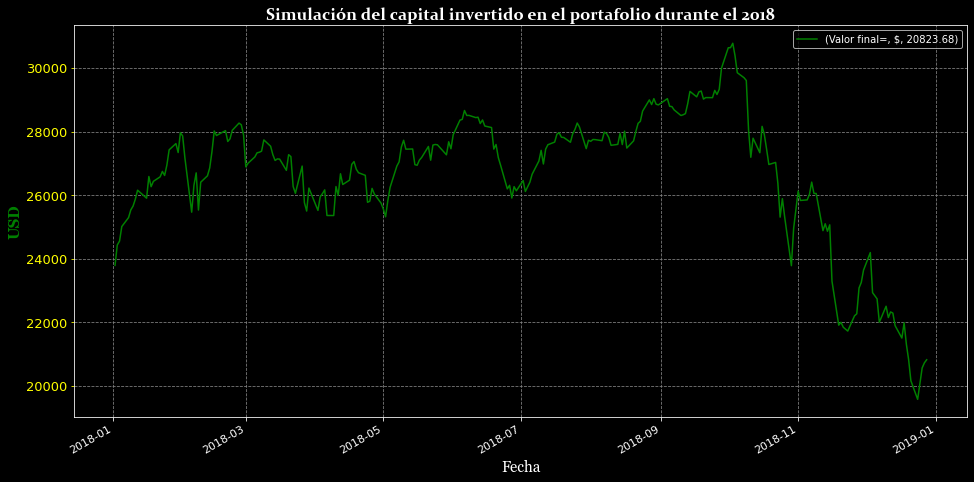

In [119]:
#Estética
plt.style.use('dark_background')
plt.rc('grid', linestyle="--", color='gray')
plt.rc('ytick', labelsize=13, color='yellow')
plt.rc('xtick', labelsize=11, color='white')

# Visualización
port_2018["Valor del portafolio"].plot(figsize = (16,8),color='g',
         label=('Valor final=','$',port_2018['Valor del portafolio'].iloc[-1].round(2)))
#Estética
plt.title("Simulación del capital invertido en el portafolio durante el 2018",size='17', weight='bold', family="Constantia")
plt.xlabel("Fecha",size='15', weight='roman', family="Georgia")
plt.ylabel("USD",size='15', weight='bold', family="Georgia", color='g')
plt.grid(True)
plt.legend(loc = "best")

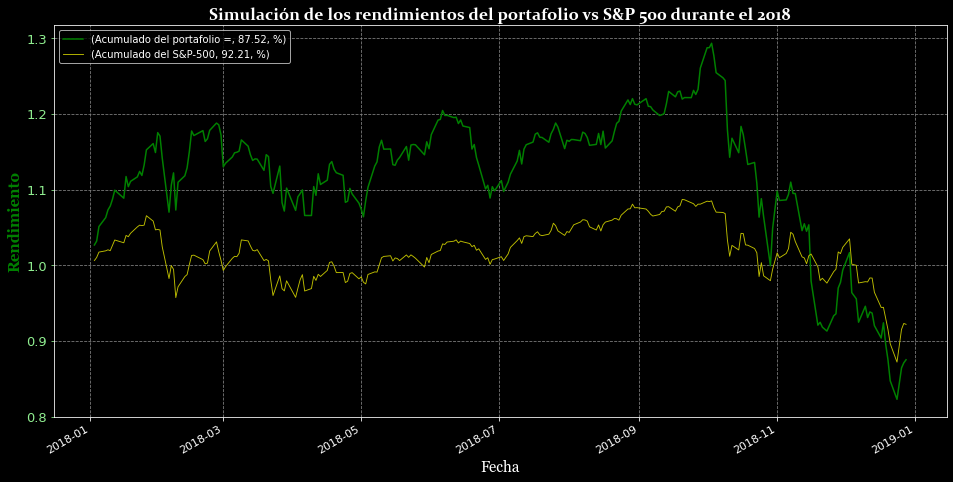

In [120]:
#Estética
plt.style.use('dark_background')
plt.rc('grid', linestyle="--", color='gray')
plt.rc('ytick', labelsize=13, color='lightgreen')
plt.rc('xtick', labelsize=11, color='white')

#  Benchmark (S&P-500)
benchmark = yf.download("^GSPC", start = "2018-01-01", end = "2018-12-31", progress = False)["Adj Close"]
benchmark = benchmark.pct_change().dropna()
br= (benchmark + 1).cumprod()

# Visualización
port_2018["Rendimiento acumulado"].plot(figsize = (16, 8), color='g',label = ('Acumulado del portafolio =',
         (port_2018['Rendimiento acumulado'].iloc[-1]*100).round(2),'%'))
br.plot(label = ("Acumulado del S&P-500", (br.iloc[-1]*100).round(2),'%'), color='y', linewidth=.9)

#Estética
plt.title("Simulación de los rendimientos del portafolio vs S&P 500 durante el 2018",size='17', weight='bold', family="Constantia")
plt.xlabel("Fecha",size='15', weight='roman', family="Georgia")
plt.ylabel("Rendimiento",size='15', weight='bold', family="Georgia", color='g')
plt.grid(True)
plt.legend(loc = "best")

### Métricas de Desempeño

In [121]:
# Ratio de Sharpe
RS_2018 = sharpe_ratio(port_2018["Rendimientos"], t, rf)
# Ratio de Sortino
RSort_2018 = sortino_ratio(port_2018["Rendimientos"], t, rf)
# Rendimiento y volatilidad anuales
ret_total_2018 = (port_2018['Valor del portafolio'][-1] / port_2018['Valor del portafolio'][0]) - 1
s_total_2018 = port_2018["Rendimientos"].std() * np.sqrt(t)

# Resultados en Dataframe
summary_2018 = pd.DataFrame({'Ratio de Sharpe': RS_2018,'Ratio de Sortino': RSort_2018,
                           'Rendimiento total': ret_total_2018,'Volatilidad anual': s_total_2018}, index = ['Portafolio 2018'])
summary_2018

,Ratio de Sharpe,Ratio de Sortino,Rendimiento total,Volatilidad anual
Portafolio 2018,-0.378927,-0.460265,-0.124766,0.290315


In [122]:
esperado_obtenido18 = pd.DataFrame({'RS % obtenido': (RS_2018/(pemv_summary['Ratio Sharpe']))*100, 
                                  'E(r) % obtenido': ((ret_total_2018/Er_pemv)*100),
                                  'σ % obtenida':((s_total_2018/s_pemv)*100)
                                 })
esperado_obtenido18

,RS % obtenido,E(r) % obtenido,σ % obtenida
Portafolio EMV,-16.279063,-26.370328,148.34712


## <font color = "black"> Portafolio de Inversión para el Año 2019 <font/>

### Teoría Moderna de Portafolios

In [123]:
# Acciones seleccionadas
stocks = ["ALK", "GOOGL", "AAPL", "BLK", "BA", "CB", "COST", "CVS", "GD", "GPC", "IFF", "JNJ", "LMT", "NOV", "NVDA", "ORCL", "ROK", "ROP", "TEL", "TXN"]
data = pd.DataFrame()

# Descarga masiva de precios históricos en temporalidad diaria
for ticker in stocks:
    data[ticker] = yf.download(ticker, start = "2015-12-31", end = "2018-12-31", progress = False)["Adj Close"]
    
# Caracterización de la distribución de los rendimientos
returns = data.pct_change().dropna()
mean_ret = returns.mean() * 252
cov = returns.cov() * 252
stocks_summary = pd.DataFrame({"Rendimiento" : mean_ret, "Volatilidad" : returns.std()*np.sqrt(252)})

# Treasury Yield Curve Rates 1Yr (2018-12-31) 
rf = 2.63 / (100)

# Datos necesarios para resolver los problemas de optimización
N = len(mean_ret)
w0 = np.ones(N) / N
bnds = ((0, None), ) * N
cons = {"type" : "eq", "fun" : lambda w : w.sum() - 1}

# Función a minimizar para encontrar el portafolio de mínima varianza
def Var(w, cov):
    return np.dot(w.T, np.dot(cov, w))

# Función a minimizar para encontrar el portafolio eficiente en media-varianza
def Minus_RatioSharpe(w, er, rf, cov):
    erp = np.dot(w.T, er)
    sp = np.dot(w.T, np.dot(cov, w))**0.5
    RS = (erp - rf) / sp
    return -RS

# Optimización con el módulo minimize
pmv = minimize(fun = Var, x0 = w0, args = (cov,), bounds = bnds, constraints = cons, tol = 1e-10)
pemv = minimize(fun = Minus_RatioSharpe, x0 = w0, args = (mean_ret, rf, cov), bounds = bnds, constraints = cons, tol = 1e-10)

In [124]:
# Ponderaciones del portafolio eficiente en media-varianza
w_pemv = pd.DataFrame(np.round(pemv.x.reshape(1, N), 4), columns = returns.columns, index = ["Ponderación"])
w_pemv[w_pemv <= 0.0] = np.nan
w_pemv.dropna(axis = 1, inplace = True)
w_pemv

,BA,COST,JNJ,NVDA
Ponderación,0.5651,0.0321,0.0786,0.3241


In [125]:
# Métricas del portafolio eficiente en media-varianza (anualizadas)
Er_pemv = np.dot(pemv.x.T, mean_ret)
s_pemv = (np.dot(pemv.x.T, np.dot(cov, pemv.x)))**0.5
rf = rf

pemv_summary = pd.DataFrame({"Rendimiento" : Er_pemv, "Volatilidad" : s_pemv,
                            "Ratio Sharpe" : (Er_pemv - rf) / s_pemv}, index = ["Portafolio EMV"])
pemv_summary

,Rendimiento,Volatilidad,Ratio Sharpe
Portafolio EMV,0.382257,0.242245,1.46941


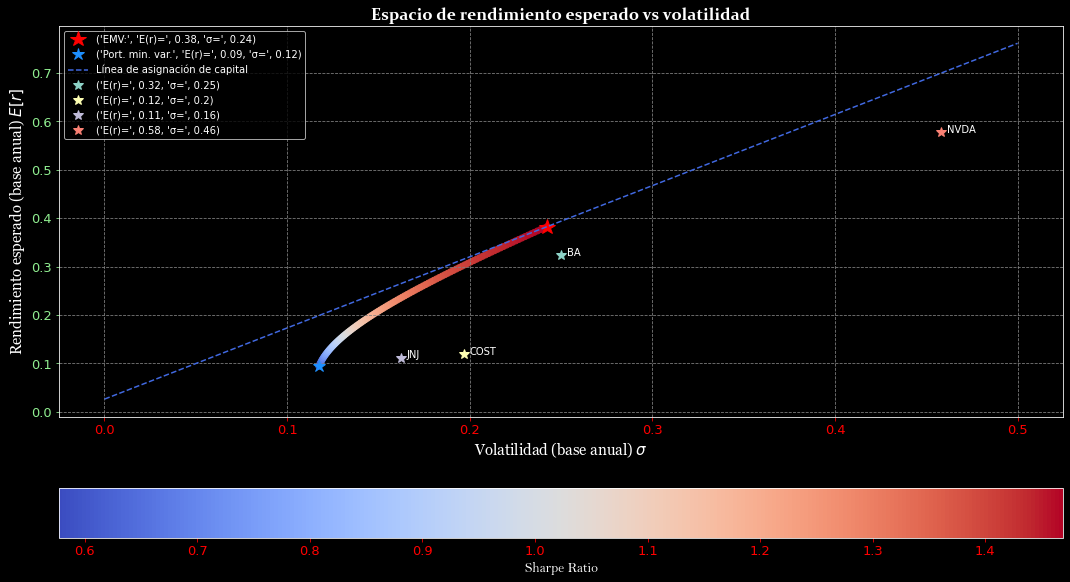

In [126]:
## Gráfico
#Estética
plt.style.use('dark_background')
plt.rc('grid', linestyle="--", color='gray')
plt.rc('ytick', labelsize=13, color='lightgreen')
plt.rc('xtick', labelsize=13, color='red')

# Frontera de mínima varianza
w = np.linspace(0, 1, 100)
Er_pmv = np.dot(pmv.x, mean_ret)
s_pmv = (np.dot(pmv.x.T, np.dot(cov, pmv.x)))**0.5
cov_pmv_pemv = np.dot(pmv.x.T, np.dot(cov, pemv.x))
minvar_frontier = pd.DataFrame({"Volatilidad" : ((w*s_pemv)**2 + 2*w*(1-w)*cov_pmv_pemv + ((1-w)*s_pmv)**2)**0.5, 
                                "Rendimiento" : w*Er_pemv + (1 - w)*Er_pmv})
minvar_frontier["Ratio Sharpe"] = (minvar_frontier["Rendimiento"] - rf) / minvar_frontier["Volatilidad"]

# LAC (Línea de Asignación de Capital)
sp = np.linspace(0, 0.5)
lac = pd.DataFrame({"Volatilidad" : sp, "Rendimiento" : pemv_summary["Ratio Sharpe"].values[0]*sp + rf})

# Visualización
plt.figure(figsize = (18, 10))
# Portafolio eficiente en media-varianza
plt.plot(s_pemv, Er_pemv, "*r", ms=16, label = ("EMV:", 'E(r)=',Er_pemv.round(2),'σ=',s_pemv.round(2)))
# Portafolio de mínima varianza
plt.plot(s_pmv, Er_pmv, "*b", ms=13, color = "dodgerblue",
         label = ("Port. min. var.", 'E(r)=',Er_pmv.round(2),'σ=',s_pmv.round(2)))
# LAC
plt.plot(lac["Volatilidad"], lac["Rendimiento"], "--", color = "royalblue", label = "Línea de asignación de capital")
# Frontera de mínima varianza
plt.scatter(minvar_frontier["Volatilidad"], minvar_frontier["Rendimiento"],
            c = minvar_frontier["Ratio Sharpe"], cmap = "coolwarm")
plt.colorbar(orientation = "horizontal", pad=0.13).set_label(label='Sharpe Ratio',size='14', weight='roman', family="Bell MT")

# Activos individuales
for i in range(len(stocks_summary)):
    if stocks_summary.index[i] in w_pemv.columns:
        plt.plot(stocks_summary.iloc[i, 1], stocks_summary.iloc[i, 0], "*", ms=10, label=('E(r)=',
        stocks_summary.iloc[i, 0].round(2),'σ=',stocks_summary.iloc[i, 1].round(2)))

        plt.text(stocks_summary.iloc[i, 1] + 0.003, stocks_summary.iloc[i, 0], stocks_summary.index[i])
#Estética
plt.title("Espacio de rendimiento esperado vs volatilidad",size='17', weight='bold', family="Constantia")
plt.xlabel("Volatilidad (base anual) $\sigma$",size='15', weight='roman', family="Georgia")
plt.ylabel("Rendimiento esperado (base anual) $E[r]$",size='15', weight='roman', family="Georgia")
plt.grid(True)
plt.legend(loc = "best")

In [127]:
## Asignación óptima del capital
# Se encuentra el coeficiente de aversión al riesgo de tal forma que todo el capital se asigne a los activos riesgosos
lambda_coef = (Er_pemv - rf) / (s_pemv**2) 
w_opt = (Er_pemv - rf) / (lambda_coef * s_pemv**2)

capital_allo = pd.DataFrame({"Aversión al riesgo" : lambda_coef,
                             "Activos riesgosos" : w_opt,
                             "Activo libre de riesgo" : 1-w_opt}, index = ["Asignación óptima de capital"]) 
capital_allo

,Aversión al riesgo,Activos riesgosos,Activo libre de riesgo
Asignación óptima de capital,6.065802,1.0,0.0


### Desempeño del Portafolio Eficiente en Media-Varianza en 2019

In [128]:
## Inversión en el portafolio eficiente en media-varianza
# Acciones cuya ponderación arrojada por el optimizador es mayor a 0
stocks = list(w_pemv.columns)
# Capital inicial
capital = port_2018["Valor del portafolio"][-1]
data = pd.DataFrame()  

# Descarga masiva de históricos para simular el comportamiento del portafolio durante el año 2016
for ticker in stocks:
    data[ticker] = yf.download(ticker, start = "2019-01-01", end = "2019-12-31", progress = False)["Adj Close"]
    
# Precios iniciales a los que se compra cada acción
p_0 = np.array(data.iloc[0,:])
# Capital invertido en cada acción
w = capital * w_pemv.iloc[0].values
# Número de acciones compradas
n_stocks = np.floor(w / p_0)

# Portafolio 
port_2019 = pd.DataFrame(data * n_stocks)
port_2019["Valor del portafolio"] = port_2019.sum(axis=1)

# Dinero en efectivo
cash = capital - port_2019["Valor del portafolio"][0]
port_2019["Valor del portafolio"] = port_2019["Valor del portafolio"] + cash

#Rendimientos diarios y acumulado del portafolio
port_2019["Rendimientos"] = port_2019["Valor del portafolio"].pct_change()
port_2019["Rendimiento acumulado"] = (port_2019["Rendimientos"] + 1).cumprod()
port_2019.head()

,BA,COST,JNJ,NVDA,Valor del portafolio,Rendimientos,Rendimiento acumulado
Date,,,,,,,
2019-01-02,11641.870239,603.182648,1572.469376,6639.821503,20823.679403,NaN,NaN
2019-01-03,11177.720551,590.397903,1547.482124,6238.663162,19920.599379,-0.043368,0.956632
2019-01-04,11759.436249,607.542435,1573.454056,6638.359039,20945.127417,0.051431,1.005832
2019-01-07,11796.465607,609.781174,1563.360687,6989.798111,21325.741217,0.018172,1.024110
2019-01-08,12243.001678,614.347275,1599.672157,6815.785156,21639.141905,0.014696,1.039160


In [129]:
port_2019.tail()

,BA,COST,JNJ,NVDA,Valor del portafolio,Rendimientos,Rendimiento acumulado
Date,,,,,,,
2019-12-23,12415.481659,872.520081,1853.335312,11686.354202,27194.026892,0.012082,1.305918
2019-12-24,12248.126892,875.256866,1846.880737,11676.567062,27013.167196,-0.006651,1.297233
2019-12-26,12134.841492,879.719055,1845.615372,11704.459290,26930.970846,-0.003043,1.293286
2019-12-27,12142.934113,874.899811,1844.602722,11590.932205,26819.704489,-0.004132,1.287943
2019-12-30,12005.371979,877.963989,1838.907684,11368.284119,26456.863409,-0.013529,1.270518


#### Comportamiento del portafolio en el 2019

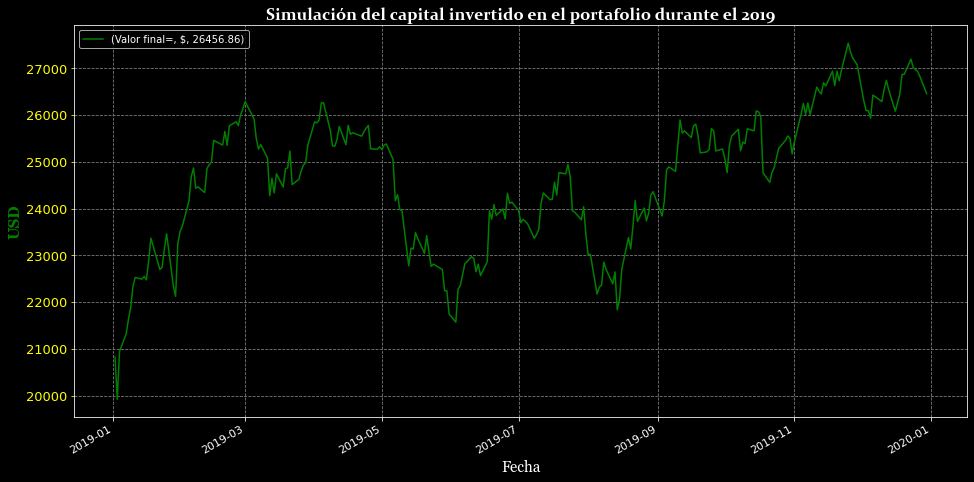

In [130]:
#Estética
plt.style.use('dark_background')
plt.rc('grid', linestyle="--", color='gray')
plt.rc('ytick', labelsize=13, color='yellow')
plt.rc('xtick', labelsize=11, color='white')

# Visualización
port_2019["Valor del portafolio"].plot(figsize = (16,8),color='g',
         label=('Valor final=','$',port_2019['Valor del portafolio'].iloc[-1].round(2)))
#Estética
plt.title("Simulación del capital invertido en el portafolio durante el 2019",size='17', weight='bold', family="Constantia")
plt.xlabel("Fecha",size='15', weight='roman', family="Georgia")
plt.ylabel("USD",size='15', weight='bold', family="Georgia", color='g')
plt.grid(True)
plt.legend(loc = "best")

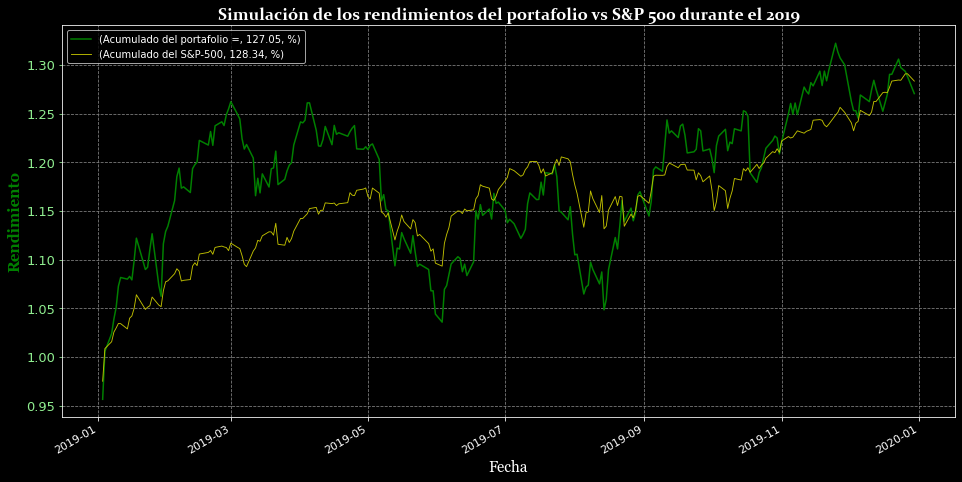

In [131]:
#Estética
plt.style.use('dark_background')
plt.rc('grid', linestyle="--", color='gray')
plt.rc('ytick', labelsize=13, color='lightgreen')
plt.rc('xtick', labelsize=11, color='white')

#  Benchmark (S&P-500)
benchmark = yf.download("^GSPC", start = "2019-01-01", end = "2019-12-31", progress = False)["Adj Close"]
benchmark = benchmark.pct_change().dropna()
br= (benchmark + 1).cumprod()

# Visualización
port_2019["Rendimiento acumulado"].plot(figsize = (16, 8), color='g',label = ('Acumulado del portafolio =',
         (port_2019['Rendimiento acumulado'].iloc[-1]*100).round(2),'%'))
br.plot(label = ("Acumulado del S&P-500", (br.iloc[-1]*100).round(2),'%'), color='y', linewidth=.9)

#Estética
plt.title("Simulación de los rendimientos del portafolio vs S&P 500 durante el 2019",size='17', weight='bold', family="Constantia")
plt.xlabel("Fecha",size='15', weight='roman', family="Georgia")
plt.ylabel("Rendimiento",size='15', weight='bold', family="Georgia", color='g')
plt.grid(True)
plt.legend(loc = "best")

### Métricas de Desempeño

In [132]:
# Ratio de Sharpe
RS_2019 = sharpe_ratio(port_2019["Rendimientos"], t, rf)
# Ratio de Sortino
RSort_2019 = sortino_ratio(port_2019["Rendimientos"], t, rf)
# Rendimiento y volatilidad anuales
ret_total_2019 = (port_2019['Valor del portafolio'][-1] / port_2019['Valor del portafolio'][0]) - 1
s_total_2019 = port_2019["Rendimientos"].std() * np.sqrt(t)

# Resultados en Dataframe
summary_2019 = pd.DataFrame({'Ratio de Sharpe': RS_2019,'Ratio de Sortino': RSort_2019,
                           'Rendimiento total': ret_total_2019,'Volatilidad anual': s_total_2019}, index = ['Portafolio 2019'])
summary_2019

,Ratio de Sharpe,Ratio de Sortino,Rendimiento total,Volatilidad anual
Portafolio 2019,1.008788,1.442716,0.270518,0.242322


In [133]:
esperado_obtenido19 = pd.DataFrame({'RS % obtenido': (RS_2019/(pemv_summary['Ratio Sharpe']))*100, 
                                  'E(r) % obtenido': ((ret_total_2019/Er_pemv)*100),
                                  'σ % obtenida':((s_total_2019/s_pemv)*100)
                                 })
esperado_obtenido19

,RS % obtenido,E(r) % obtenido,σ % obtenida
Portafolio EMV,68.652585,70.768628,100.031688


## <font color = "black"> Portafolio de Inversión para el Año 2020 <font/>

### Teoría Moderna de Portafolios

In [136]:
# Acciones seleccionadas
stocks = ["ALK", "GOOGL", "AAPL", "BLK", "BA", "CB", "COST", "CVS", "GD", "GPC", "IFF", "JNJ", "LMT", "NOV", "NVDA", "ORCL", "ROK", "ROP", "TEL", "TXN"]
data = pd.DataFrame()

# Descarga masiva de precios históricos en temporalidad diaria
for ticker in stocks:
    data[ticker] = yf.download(ticker, start = "2016-12-31", end = "2019-12-31", progress = False)["Adj Close"]
    
# Caracterización de la distribución de los rendimientos
returns = data.pct_change().dropna()
mean_ret = returns.mean() * 252
cov = returns.cov() * 252
stocks_summary = pd.DataFrame({"Rendimiento" : mean_ret, "Volatilidad" : returns.std()*np.sqrt(252)})

# Treasury Yield Curve Rates 1Yr (2019-12-31) 
rf = 1.59 / (100)

# Datos necesarios para resolver los problemas de optimización
N = len(mean_ret)
w0 = np.ones(N) / N
bnds = ((0, None), ) * N
cons = {"type" : "eq", "fun" : lambda w : w.sum() - 1}

# Función a minimizar para encontrar el portafolio de mínima varianza
def Var(w, cov):
    return np.dot(w.T, np.dot(cov, w))

# Función a minimizar para encontrar el portafolio eficiente en media-varianza
def Minus_RatioSharpe(w, er, rf, cov):
    erp = np.dot(w.T, er)
    sp = np.dot(w.T, np.dot(cov, w))**0.5
    RS = (erp - rf) / sp
    return -RS

# Optimización con el módulo minimize
pmv = minimize(fun = Var, x0 = w0, args = (cov,), bounds = bnds, constraints = cons, tol = 1e-10)
pemv = minimize(fun = Minus_RatioSharpe, x0 = w0, args = (mean_ret, rf, cov), bounds = bnds, constraints = cons, tol = 1e-10)

In [137]:
# Ponderaciones del portafolio eficiente en media-varianza
w_pemv = pd.DataFrame(np.round(pemv.x.reshape(1, N), 4), columns = returns.columns, index = ["Ponderación"])
w_pemv[w_pemv <= 0.0] = np.nan
w_pemv.dropna(axis = 1, inplace = True)
w_pemv

,AAPL,BA,COST,LMT,ROP
Ponderación,0.2985,0.1205,0.325,0.0841,0.1718


In [138]:
# Métricas del portafolio eficiente en media-varianza
Er_pemv = np.dot(pemv.x.T, mean_ret)
s_pemv = (np.dot(pemv.x.T, np.dot(cov, pemv.x)))**0.5
rf = rf

pemv_summary = pd.DataFrame({"Rendimiento" : Er_pemv, "Volatilidad" : s_pemv,
                            "Ratio Sharpe" : (Er_pemv - rf) / s_pemv}, index = ["Portafolio EMV"])
pemv_summary

,Rendimiento,Volatilidad,Ratio Sharpe
Portafolio EMV,0.280962,0.156008,1.699032


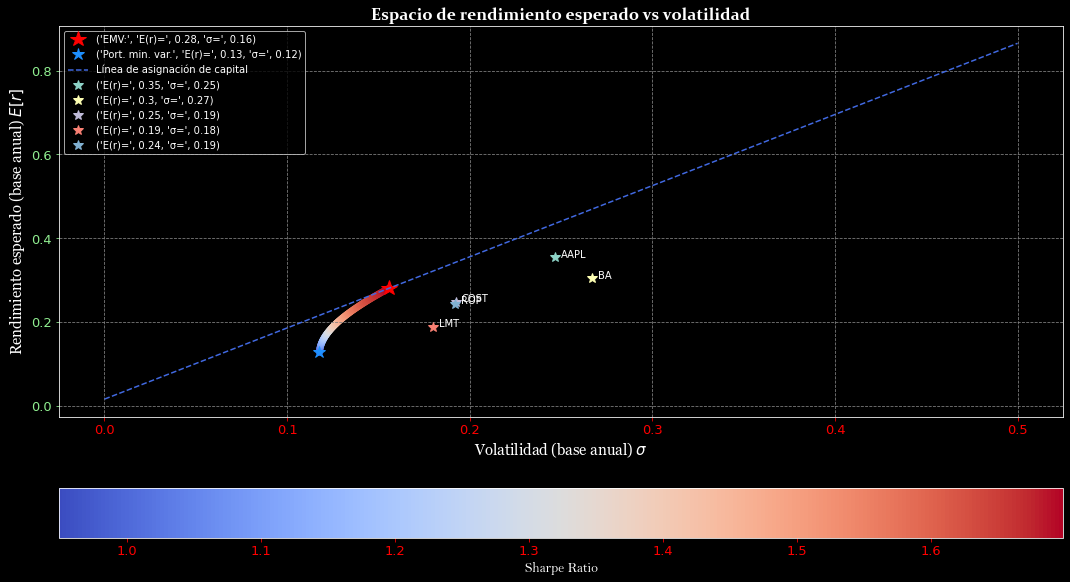

In [139]:
## Gráfico
#Estética
plt.style.use('dark_background')
plt.rc('grid', linestyle="--", color='gray')
plt.rc('ytick', labelsize=13, color='lightgreen')
plt.rc('xtick', labelsize=13, color='red')

# Frontera de mínima varianza
w = np.linspace(0, 1, 100)
Er_pmv = np.dot(pmv.x, mean_ret)
s_pmv = (np.dot(pmv.x.T, np.dot(cov, pmv.x)))**0.5
cov_pmv_pemv = np.dot(pmv.x.T, np.dot(cov, pemv.x))
minvar_frontier = pd.DataFrame({"Volatilidad" : ((w*s_pemv)**2 + 2*w*(1-w)*cov_pmv_pemv + ((1-w)*s_pmv)**2)**0.5, 
                                "Rendimiento" : w*Er_pemv + (1 - w)*Er_pmv})
minvar_frontier["Ratio Sharpe"] = (minvar_frontier["Rendimiento"] - rf) / minvar_frontier["Volatilidad"]

# LAC (Línea de Asignación de Capital)
sp = np.linspace(0, 0.5)
lac = pd.DataFrame({"Volatilidad" : sp, "Rendimiento" : pemv_summary["Ratio Sharpe"].values[0]*sp + rf})

# Visualización
plt.figure(figsize = (18, 10))
# Portafolio eficiente en media-varianza
plt.plot(s_pemv, Er_pemv, "*r", ms=16, label = ("EMV:", 'E(r)=',Er_pemv.round(2),'σ=',s_pemv.round(2)))
# Portafolio de mínima varianza
plt.plot(s_pmv, Er_pmv, "*b", ms=13, color = "dodgerblue",
         label = ("Port. min. var.", 'E(r)=',Er_pmv.round(2),'σ=',s_pmv.round(2)))
# LAC
plt.plot(lac["Volatilidad"], lac["Rendimiento"], "--", color = "royalblue", label = "Línea de asignación de capital")
# Frontera de mínima varianza
plt.scatter(minvar_frontier["Volatilidad"], minvar_frontier["Rendimiento"],
            c = minvar_frontier["Ratio Sharpe"], cmap = "coolwarm")
plt.colorbar(orientation = "horizontal", pad=0.13).set_label(label='Sharpe Ratio',size='14', weight='roman', family="Bell MT")

# Activos individuales
for i in range(len(stocks_summary)):
    if stocks_summary.index[i] in w_pemv.columns:
        plt.plot(stocks_summary.iloc[i, 1], stocks_summary.iloc[i, 0], "*", ms=10, label=('E(r)=',
        stocks_summary.iloc[i, 0].round(2),'σ=',stocks_summary.iloc[i, 1].round(2)))

        plt.text(stocks_summary.iloc[i, 1] + 0.003, stocks_summary.iloc[i, 0], stocks_summary.index[i])
#Estética
plt.title("Espacio de rendimiento esperado vs volatilidad",size='17', weight='bold', family="Constantia")
plt.xlabel("Volatilidad (base anual) $\sigma$",size='15', weight='roman', family="Georgia")
plt.ylabel("Rendimiento esperado (base anual) $E[r]$",size='15', weight='roman', family="Georgia")
plt.grid(True)
plt.legend(loc = "best")

In [140]:
## Asignación óptima del capital
# Se encuentra el coeficiente de aversión al riesgo de tal forma que todo el capital se asigne a los activos riesgosos
lambda_coef = (Er_pemv - rf) / (s_pemv**2) 
w_opt = (Er_pemv - rf) / (lambda_coef * s_pemv**2)

capital_allo = pd.DataFrame({"Aversión al riesgo" : lambda_coef,
                             "Activos riesgosos" : w_opt,
                             "Activo libre de riesgo" : 1-w_opt}, index = ["Asignación óptima de capital"]) 
capital_allo

,Aversión al riesgo,Activos riesgosos,Activo libre de riesgo
Asignación óptima de capital,10.890675,1.0,0.0


### Desempeño del Portafolio Eficiente en Media-Varianza en el transcurso del 2020 
##### 2020-01-01 a 2020-11-25:

In [141]:
## Inversión en el portafolio eficiente en media-varianza
# Acciones cuya ponderación arrojada por el optimizador es mayor a 0
stocks = list(w_pemv.columns)
# Capital inicial
capital = port_2019["Valor del portafolio"][-1]
data = pd.DataFrame()  

# Descarga masiva de históricos para simular el comportamiento del portafolio durante el año 2016
for ticker in stocks:
    data[ticker] = yf.download(ticker, start = "2020-01-01", end = "2020-11-25", progress = False)["Adj Close"]
    
# Precios iniciales a los que se compra cada acción
p_0 = np.array(data.iloc[0,:])
# Capital invertido en cada acción
w = capital * w_pemv.iloc[0].values
# Número de acciones compradas
n_stocks = np.floor(w / p_0)

# Portafolio 
port_2020 = pd.DataFrame(data * n_stocks)
port_2020["Valor del portafolio"] = port_2020.sum(axis=1)

# Dinero en efectivo
cash = capital - port_2020["Valor del portafolio"][0]
port_2020["Valor del portafolio"] = port_2020["Valor del portafolio"] + cash

#Rendimientos diarios y acumulado del portafolio
port_2020["Rendimientos"] = port_2020["Valor del portafolio"].pct_change()
port_2020["Rendimiento acumulado"] = (port_2020["Rendimientos"] + 1).cumprod()
port_2020.head()

,AAPL,BA,COST,LMT,ROP,Valor del portafolio,Rendimientos,Rendimiento acumulado
Date,,,,,,,,
2020-01-02,7827.044464,2982.137146,8382.025726,1960.469818,4357.284302,26456.863409,NaN,NaN
2020-01-03,7750.948349,2977.127106,8388.927032,2031.010590,4331.749146,26427.664175,-0.001104,0.998896
2020-01-06,7812.710785,2985.894745,8391.226288,2027.918091,4290.941162,26456.593023,0.001095,0.999990
2020-01-07,7775.967590,3017.566406,8377.999817,2034.741364,4312.777222,26466.954351,0.000392,1.000381
2020-01-08,7901.053284,2964.690857,8474.044617,2017.707520,4359.892090,26665.290319,0.007494,1.007878


In [142]:
port_2020.tail()

,AAPL,BA,COST,LMT,ROP,Valor del portafolio,Rendimientos,Rendimiento acumulado
Date,,,,,,,,
2020-11-18,12511.179871,1829.700027,11084.670319,1887.799988,4900.439941,33161.692099,-0.004652,1.253425
2020-11-19,12575.839935,1851.029984,11122.660248,1882.299957,4913.760132,33293.492208,0.003974,1.258407
2020-11-20,12438.039612,1796.579956,11052.479858,1840.099945,4863.120117,32938.221441,-0.010671,1.244978
2020-11-23,12068.099838,1903.769989,11069.589752,1854.250031,4868.640015,32712.251577,-0.006860,1.236437
2020-11-24,12208.019806,1966.410049,11142.380035,1892.400055,5022.359985,33179.471884,0.014283,1.254097


#### Comportamiento del portafolio en el 2020

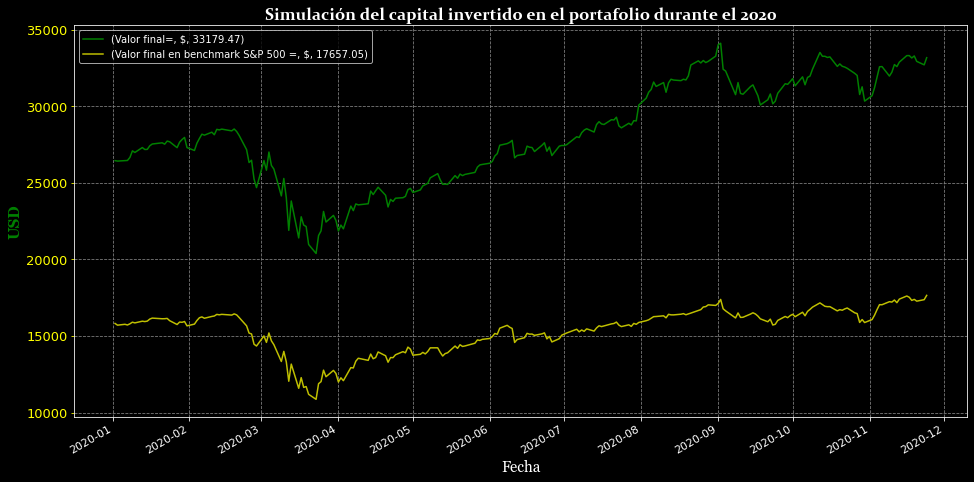

In [143]:
#  Benchmark (S&P-500)
benchmarkf = yf.download("^GSPC", start = "2014-12-31", end = "2020-11-25", progress = False)["Adj Close"]
benchmarkf = benchmarkf.pct_change().dropna()
brf = (benchmarkf + 1).cumprod()*10000
brf = brf[1258:1487]

#Estética
plt.style.use('dark_background')
plt.rc('grid', linestyle="--", color='gray')
plt.rc('ytick', labelsize=13, color='yellow')
plt.rc('xtick', labelsize=11, color='white')

# Visualización
port_2020["Valor del portafolio"].plot(figsize = (16,8),color='g',
         label=('Valor final=','$',port_2020['Valor del portafolio'].iloc[-1].round(2)))
brf.plot(color='y',label=('Valor final en benchmark S&P 500 =','$',brf.iloc[-1].round(2)))

#Estética
plt.title("Simulación del capital invertido en el portafolio durante el 2020",size='17', weight='bold', family="Constantia")
plt.xlabel("Fecha",size='15', weight='roman', family="Georgia")
plt.ylabel("USD",size='15', weight='bold', family="Georgia", color='g')
plt.grid(True)
plt.legend(loc = "best")
plt.show()

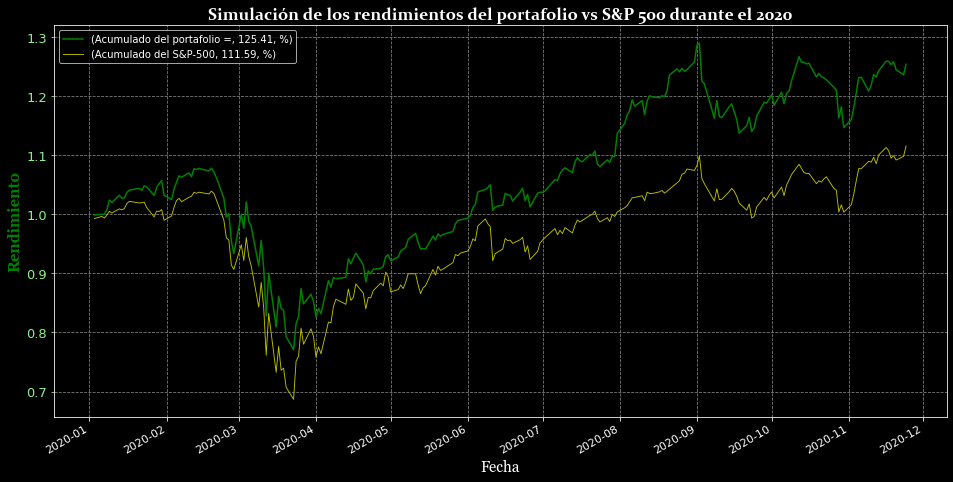

In [144]:
#Estética
plt.style.use('dark_background')
plt.rc('grid', linestyle="--", color='gray')
plt.rc('ytick', labelsize=13, color='lightgreen')
plt.rc('xtick', labelsize=11, color='white')

#  Benchmark (S&P-500)
benchmark = yf.download("^GSPC", start = "2020-01-01", end = "2020-11-25", progress = False)["Adj Close"]
benchmark = benchmark.pct_change().dropna()
br= (benchmark + 1).cumprod()

# Visualización
port_2020["Rendimiento acumulado"].plot(figsize = (16, 8), color='g',label = ('Acumulado del portafolio =',
         (port_2020['Rendimiento acumulado'].iloc[-1]*100).round(2),'%'))
br.plot(label = ("Acumulado del S&P-500", (br.iloc[-1]*100).round(2),'%'), color='y', linewidth=.9)

#Estética
plt.title("Simulación de los rendimientos del portafolio vs S&P 500 durante el 2020",size='17', weight='bold', family="Constantia")
plt.xlabel("Fecha",size='15', weight='roman', family="Georgia")
plt.ylabel("Rendimiento",size='15', weight='bold', family="Georgia", color='g')
plt.grid(True)
plt.legend(loc = "best")

### Métricas de Desempeño

In [145]:
# Ratio de Sharpe
RS_2020 = sharpe_ratio(port_2020["Rendimientos"], t, rf)
# Ratio de Sortino
RSort_2020 = sortino_ratio(port_2020["Rendimientos"], t, rf)
# Rendimiento y volatilidad anuales
ret_total_2020 = (port_2020['Valor del portafolio'][-1] / port_2020['Valor del portafolio'][0]) - 1
s_total_2020 = port_2020["Rendimientos"].std() * np.sqrt(t)

# Resultados en Dataframe
summary_2020 = pd.DataFrame({'Ratio de Sharpe': RS_2020,'Ratio de Sortino': RSort_2020,
                           'Rendimiento total': ret_total_2020,'Volatilidad anual': s_total_2020}, index = ['Portafolio 2020'])
summary_2020

,Ratio de Sharpe,Ratio de Sortino,Rendimiento total,Volatilidad anual
Portafolio 2020,0.854659,1.010167,0.254097,0.345718


In [153]:
esperado_obtenido20 = pd.DataFrame({'RS % obtenido': (RS_2020/(pemv_summary['Ratio Sharpe']))*100, 
                                  'E(r) % obtenido': ((ret_total_2020/Er_pemv)*100),
                                  'σ % obtenida':((s_total_2020/s_pemv)*100)
                                 })
esperado_obtenido20

,RS % obtenido,E(r) % obtenido,σ % obtenida
Portafolio EMV,50.302701,90.438036,221.602644


## Rendimiento Total / Rendimiento Promedio Anual
### Periodo de Tenencia (2015 - 2020)

In [154]:
# Rendimiento promedio anual 
rg = ((1 + summary_2015["Rendimiento total"].values[0]) * (1 + summary_2016["Rendimiento total"].values[0]) * (1 + summary_2017["Rendimiento total"].values[0]) * (1 + summary_2018["Rendimiento total"].values[0]) * (1 + summary_2019["Rendimiento total"].values[0]) * (1 + summary_2020["Rendimiento total"].values[0])) ** (1 / 6) - 1

portfolio_summary = pd.DataFrame({"Rendimiento total" : port_2020["Valor del portafolio"][-1] / port_2015["Valor del portafolio"][0] - 1,
                                  "Rendimiento promedio anual" : rg,
                                  "Capital final (USD)" : port_2020["Valor del portafolio"][-1]}, index = ["Portafolio 2015-2020"])
portfolio_summary

,Rendimiento total,Rendimiento promedio anual,Capital final (USD)
Portafolio 2015-2020,2.317947,0.22127,33179.471884


### *Métricas porcentuales alcanzadas (2015 - 2020)*

In [162]:
(esperado_obtenido15+esperado_obtenido16+esperado_obtenido17+esperado_obtenido18+esperado_obtenido19+esperado_obtenido20)/6

,RS % obtenido,E(r) % obtenido,σ % obtenida
Portafolio EMV,53.893132,67.0841,134.252377


### *Métricas porcentuales alcanzadas sin años en crisis (2015,2018,2020)*

In [164]:
(esperado_obtenido16+esperado_obtenido17+esperado_obtenido19)/3

,RS % obtenido,E(r) % obtenido,σ % obtenida
Portafolio EMV,85.27181,99.125572,103.369828


## Referencias consultadas

+ Investopedia. (2020). Return on Invested Capital (ROIC). Consultado el 22 de noviembre del 2020, de Investopedia. Sitio web: https://www.investopedia.com/terms/r/returnoninvestmentcapital.asp
+ Investopedia. (2020). Measuring Portfolio Performance. Consultado el 25 de noviembre del 2020, de Investopedia Sitio web: https://www.investopedia.com/articles/08/performance-measure.asp
+ U.S. DEPARTMENT OF THE TREASURY. (2020). Daily Treasury Yield Curve Rates. Consultado el 25 de noviembre del 2020, de U.S. DEPARTMENT OF THE TREASURY. Sitio web: https://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/TextView.aspx?data=yieldYear&year=2019
+ Wikipedia. (2020). Earnings per share. Consultado el 22 de noviembre del 2020, de Wikipedia. Sitio web: https://en.wikipedia.org/wiki/Earnings_per_share
+ Wikipedia. (2020). Ratio precio-beneficio. Consultado el 22 de noviembre del 2020, de Wikipedia. Sitio web: https://es.wikipedia.org/wiki/Ratio_precio-beneficio
+ Wikipedia. (2020). Times interest earned. Consultado el 22 de noviembre del 2020, de Wikipedia. Sitio web: https://en.wikipedia.org/wiki/Times_interest_earned
